# Exploring MLS

## Summary

The dataframe used here is the cleaned MLS data that was exported from the previous notebook: 1_Cleaning_MLS. In this notebook, I will explore the trends in the MLS listings in the Greater Houston area from 2015 onward.

## Import

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import copy

pd.set_option('display.max_columns', None) # Displays all columns

from scipy.stats import kurtosis, skew

import warnings
warnings.filterwarnings('ignore')

### Functions

In [2]:
def view(dataframe, n: int=3):
    """Displays the preview of the first and last rows of the dataframe
    Args:
        dataframe: The dataframe being called
        n: Number of rows to select for preview. Defaults to 3.
    Returns:
        The first n and the last n rows of the dataframe
    """

    with pd.option_context('display.max_rows',n*2):
        display(dataframe)

In [3]:
def rename(dataframe, column, original, rename):
    """Replaces all instances of a specific string in one column with a new string
    Args:
        dataframe: The dataframe being called
        column: The column being called
        oringal: Original string to be replaced
        rename: New string to replace original string
    """

    dataframe.loc[dataframe[column].str.contains(original), column] = str(rename)
    return

In [4]:
def stats(dataframe, column):
    """Generates single column stats and boxplot
    Args:
        dataframe: The dataframe being called
        column: The column being called
    Returns:
        Descriptive statistics and boxplot of the column
    """
    
    print(f'Data type: {dataframe[column].dtype}')
    print(f'Count: {dataframe[column].shape[0]}')
    print(f'Number of Unique Values: {dataframe[column].nunique()}')
    print(f'Number of nulls: {dataframe[column].isna().sum()} - {round(100*dataframe[column].isna().sum()/len(dataframe),2)}%')
    print()
    print(f'Mean: {dataframe[column].mean()}')
    print(f'Minimum: {dataframe[column].min()}')
    print(f'Lower Quartile: {dataframe[column].quantile(.25)}')
    print(f'Median: {dataframe[column].quantile(.5)}')
    print(f'Upper Quartile: {dataframe[column].quantile(.75)}')
    print(f'Maximum: {dataframe[column].max()}')

    plt.figure(figsize=(10,1))
    plt.title(f'Boxplot Distrubution of {column}', fontsize=14, fontweight='bold')
    ax = sns.boxplot(x=dataframe[column])
    plt.xlabel(column, fontsize=13, fontweight='bold')
    plt.show()

In [5]:
def preview_cols(dataframe):
    """Generates quick preview of each column in the dataframe
    Args:
        dataframe: The dataframe being called
    Returns:
        Datatype
        Number of unique values
        Number of nulls
        Descriptive statistics and boxplot for numeric columns
        The first n and the last n values of the column
        Visualization of most frequent values
        
    """
    
    for i in dataframe.columns:
        print(i.upper())
        print()
        if (dataframe[i].dtype=='int' or dataframe[i].dtype=='float'): 
            print(stats(dataframe,i))
        else: 
            print(f'Data type: {dataframe[i].dtype}')
            print(f'Number of unique values: {dataframe[i].nunique()}')
            print(f'Number of nulls: {dataframe[i].isna().sum()} - {round(100*dataframe[i].isna().sum()/len(dataframe),2)}%')
            print (dataframe[i].describe())
        print()
        print(view(dataframe[~dataframe[i].isna()][i].astype('str').value_counts().sort_index()))
        print()
        dataframe[i].value_counts().head(20).plot(kind='barh', figsize=(8,6))
        plt.title(f'Most common values in the {i} column', fontsize=14, fontweight='bold')
        plt.ylabel('Value', fontsize=13, fontweight='bold')
        plt.xlabel('Frequency of Occurence', fontsize=13, fontweight='bold')
        plt.show()
        print()
        print('*'*50)
        print()

## Load and Preview

In [6]:
df = pd.read_csv('har_cleaned.csv', index_col=0)

In [7]:
view(df,3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,dom,cdom,last_change_timestamp,list_date,fireplace,garage
3,47405549,Single-Family,Sold,723,Broadway,Winnie,77665,Chambers,39900,25000,2017-09-20 00:00:00,53,18 - East Chambers,EAST CHAMBERS ELEMENTARY SCHOOL,EAST CHAMBERS J H,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,1.0,False,Not New,False,0.0,123,2017-09-21 14:59:24,2017-08-23 00:00:00,False,False
4,86143414,Townhouse/Condo,Sold,"7 A,B & H",Dana,Galveston,77554,Galveston,25000,25000,2017-09-11 00:00:00,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,801.0,2242.8,1984,1.0,1.0,0.0,2.0,False,Not New,False,49.0,49,2017-09-11 15:43:04,2017-07-07 00:00:00,True,True
6,99874455,Townhouse/Condo,Sold,13151,Walden,Montgomery,77356,Montgomery,36000,36000,2017-09-29 00:00:00,39,37 - Montgomery,MADELEY RANCH ELEMENTARY SCHOOL,MONTGOMERY JUNIOR HIGH SCHOOL,MONTGOMERY HIGH SCHOOL,489.0,1956.0,1979,1.0,1.0,0.0,1.0,False,Not New,False,86.0,86,2017-09-29 13:35:36,2017-06-02 00:00:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371429,56912411,Single-Family,Withdrawn,16702,Bridle Oak,Cypress,77433,Harris,4989000,0,1900-01-01 00:00:00,35,13 - Cypress-Fairbanks,KEITH ELEMENTARY SCHOOL,SALYARDS MIDDLE SCHOOL,BRIDGELAND HIGH SCHOOL,9784.0,958320.0,2006,6.0,6.0,3.0,2.0,False,Not New,True,240.0,240,2019-04-11 13:17:58,2018-08-14 00:00:00,True,True
371431,40170341,Single-Family,Withdrawn,8818,Sandringham,Houston,77024,Harris,5250000,0,1900-01-01 00:00:00,23,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),7007.0,75520.0,1957,6.0,5.0,1.0,1.0,False,Not New,True,34.0,34,2019-05-01 12:17:00,2019-01-25 00:00:00,True,False
371432,10817804,Single-Family,Withdrawn,314,Hunters Trail,Houston,77024,Harris,5999900,0,1900-01-01 00:00:00,23,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,27958.0,2019,6.0,6.0,3.0,2.0,True,To Be Built/Under Construction,False,71.0,106,2019-06-04 10:00:42,2019-03-25 00:00:00,True,True


### Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323864 entries, 3 to 371432
Data columns (total 32 columns):
mls_number               323864 non-null int64
property_type            323864 non-null object
status                   323864 non-null object
street_number            323864 non-null object
street_name              323864 non-null object
city                     323864 non-null object
zip_code                 323864 non-null int64
county                   323864 non-null object
list_price               323864 non-null int64
close_price              323864 non-null int64
close_date               323864 non-null object
area                     323864 non-null int64
school_district          323864 non-null object
school_elementary        323864 non-null object
school_middle            323864 non-null object
school_high              323864 non-null object
sq_ft_total              323864 non-null float64
lot_size                 323864 non-null float64
year_built               323

### Columns

**MLS Information:**
* MLS Number
* Property Type
* Status

**Geographical Location:**
* Street Number
* Street Name
* City/Location
* Zip Code
* County

**Closing Details:**
* List Price
* Close Price
* Close Date

**Community Location:**
* Area
* School District
* School Elementary
* School Middle
* School High

**Property Size and Attributes:**
* Sq Ft Total
* Lot Size
* Year Built
* Bedrooms
* Baths Full
* Baths Half
* Fireplace
* Stories
* New Construction
* New Construction Description
* Pool Private
* Garage

**Listing and Selling Information:**
* Last Change Timestamp
* List Date

### Describe

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mls_number,323864.0,5.048948e+07,2.818522e+07,104240.0,26161903.25,50375908.0,74847768.75,338218412.0
zip_code,323864.0,7.730930e+04,1.991048e+02,77002.0,77077.00,77377.0,77471.00,78950.0
list_price,323864.0,3.380528e+05,3.415473e+05,20000.0,189900.00,264900.0,379900.00,29999999.0
close_price,323864.0,1.615131e+05,2.240112e+05,0.0,0.00,140000.0,249900.00,17500000.0
area,323864.0,2.110999e+01,1.281462e+01,1.0,10.00,20.0,33.00,86.0
sq_ft_total,323864.0,2.530677e+03,1.149833e+03,450.0,1790.00,2354.0,3062.00,217800.0
lot_size,323864.0,1.973022e+04,1.757913e+06,0.0,6070.00,7800.0,10337.25,999999999.0
year_built,323864.0,1.997073e+03,1.870609e+01,1950.0,1982.00,2003.0,2013.00,2019.0
bedrooms,323864.0,3.557080e+00,8.381068e-01,1.0,3.00,4.0,4.00,30.0
baths_full,323864.0,2.416073e+00,7.942564e-01,1.0,2.00,2.0,3.00,31.0


### Preview Columns

MLS_NUMBER

Data type: int64
Count: 323864
Number of Unique Values: 323864
Number of nulls: 0 - 0.0%

Mean: 50489483.234055035
Minimum: 104240
Lower Quartile: 26161903.25
Median: 50375908.0
Upper Quartile: 74847768.75
Maximum: 338218412


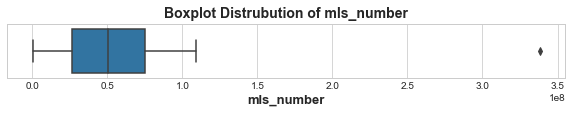

None



10000122    1
10000191    1
10000324    1
           ..
99999204    1
99999419    1
9999959     1
Name: mls_number, Length: 323864, dtype: int64

None



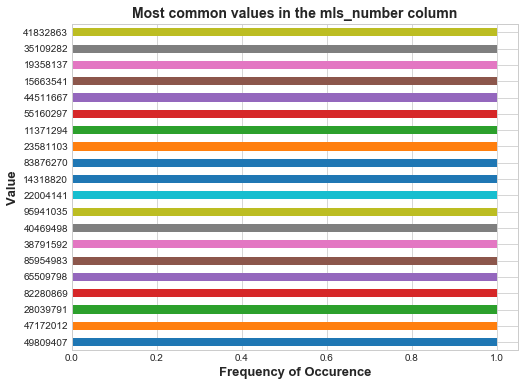


**************************************************

PROPERTY_TYPE

Data type: object
Number of unique values: 4
Number of nulls: 0 - 0.0%
count            323864
unique                4
top       Single-Family
freq             298456
Name: property_type, dtype: object



Mid/Hi-Rise Condo       115
Multi-Family             37
Single-Family        298456
Townhouse/Condo       25256
Name: property_type, dtype: int64

None



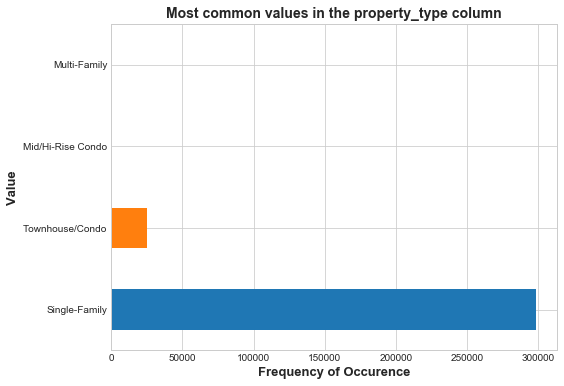


**************************************************

STATUS

Data type: object
Number of unique values: 8
Number of nulls: 0 - 0.0%
count     323864
unique         8
top         Sold
freq      185413
Name: status, dtype: object



Active             23934
Expired            30932
Option Pending      2108
                   ...  
Sold              185413
Terminated         69270
Withdrawn           2806
Name: status, Length: 8, dtype: int64

None



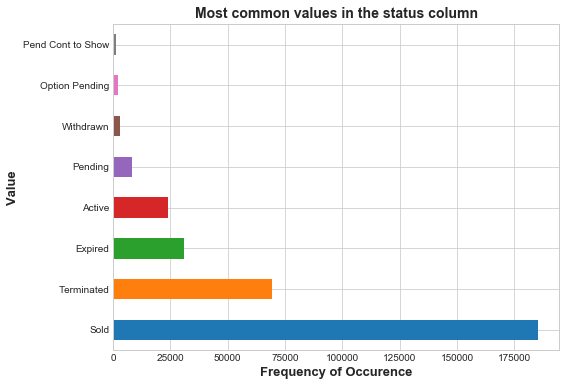


**************************************************

STREET_NUMBER

Data type: object
Number of unique values: 21679
Number of nulls: 0 - 0.0%
count     323864
unique     21679
top           10
freq         288
Name: street_number, dtype: object



0          72
00          6
000         7
           ..
S614300     1
TBD         6
TR 4-2      1
Name: street_number, Length: 21679, dtype: int64

None



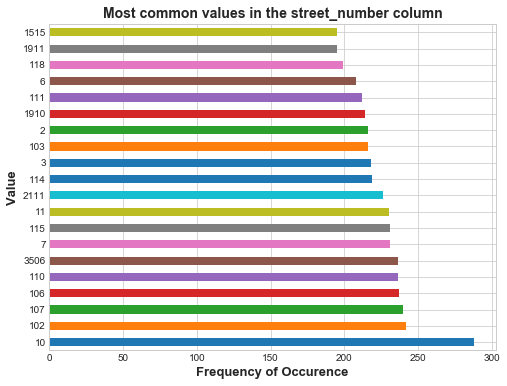


**************************************************

STREET_NAME

Data type: object
Number of unique values: 51579
Number of nulls: 0 - 0.0%
count      323864
unique      51579
top       Seawall
freq          436
Name: street_name, dtype: object



1                  1
1/2 Boss Gaston    1
1/2 Cedar St       1
                  ..
woolridge          1
wornington ct      1
yorkshire oak      1
Name: street_name, Length: 51579, dtype: int64

None



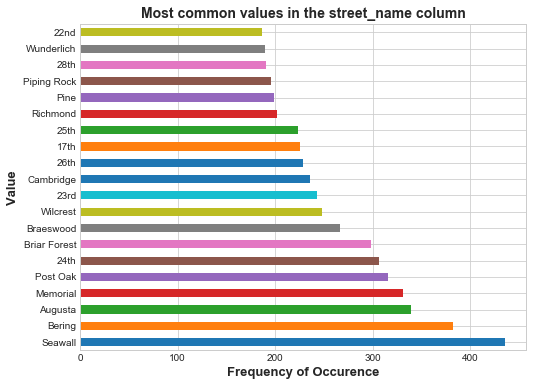


**************************************************

CITY

Data type: object
Number of unique values: 95
Number of nulls: 0 - 0.0%
count      323864
unique         95
top       Houston
freq       114398
Name: city, dtype: object



Alief               2
Alvin            1536
Anahuac           120
                 ... 
West Columbia     189
Willis           2260
Winnie             63
Name: city, Length: 95, dtype: int64

None



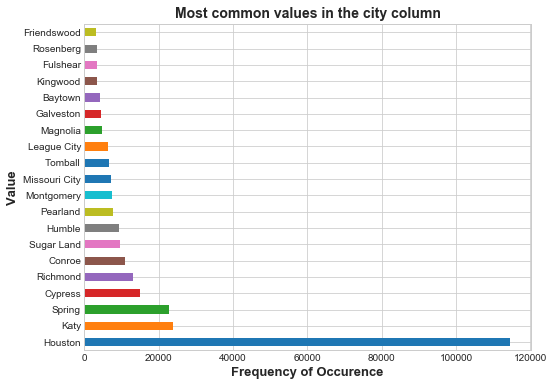


**************************************************

ZIP_CODE

Data type: int64
Count: 323864
Number of Unique Values: 220
Number of nulls: 0 - 0.0%

Mean: 77309.30023404886
Minimum: 77002
Lower Quartile: 77077.0
Median: 77377.0
Upper Quartile: 77471.0
Maximum: 78950


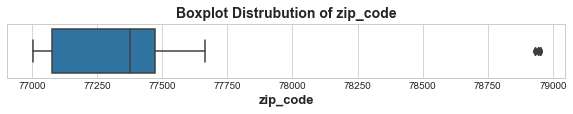

None



77002      75
77003    1067
77004    1581
         ... 
78933       3
78944       2
78950       8
Name: zip_code, Length: 220, dtype: int64

None



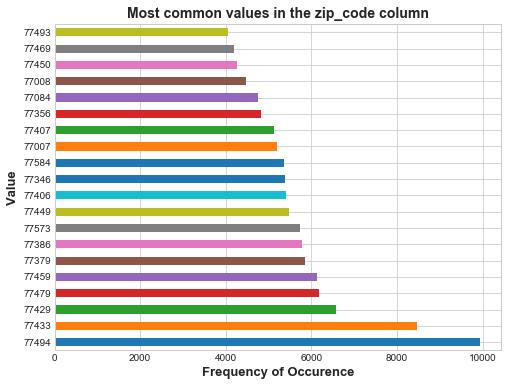


**************************************************

COUNTY

Data type: object
Number of unique values: 9
Number of nulls: 0 - 0.0%
count     323864
unique         9
top       Harris
freq      192525
Name: county, dtype: object



Austin          518
Brazoria      14960
Chambers       1903
              ...  
Liberty        2051
Montgomery    37744
Waller         2192
Name: county, Length: 9, dtype: int64

None



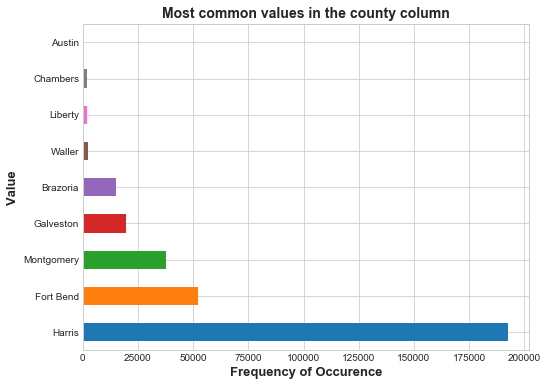


**************************************************

LIST_PRICE

Data type: int64
Count: 323864
Number of Unique Values: 26923
Number of nulls: 0 - 0.0%

Mean: 338052.7981344021
Minimum: 20000
Lower Quartile: 189900.0
Median: 264900.0
Upper Quartile: 379900.0
Maximum: 29999999


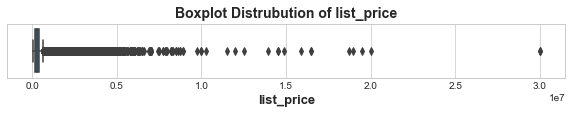

None



100000      369
1000000      79
10000000      1
           ... 
999990        6
999995        6
999999       53
Name: list_price, Length: 26923, dtype: int64

None



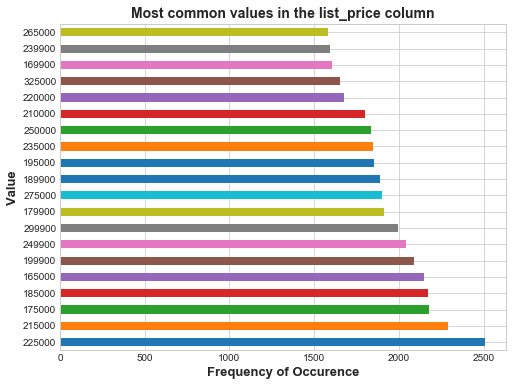


**************************************************

CLOSE_PRICE

Data type: int64
Count: 323864
Number of Unique Values: 21591
Number of nulls: 0 - 0.0%

Mean: 161513.09027863547
Minimum: 0
Lower Quartile: 0.0
Median: 140000.0
Upper Quartile: 249900.0
Maximum: 17500000


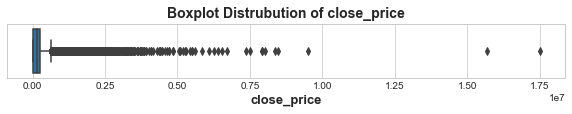

None



0          138451
100000        343
1000000        52
            ...  
999900          3
999995          1
999999          3
Name: close_price, Length: 21591, dtype: int64

None



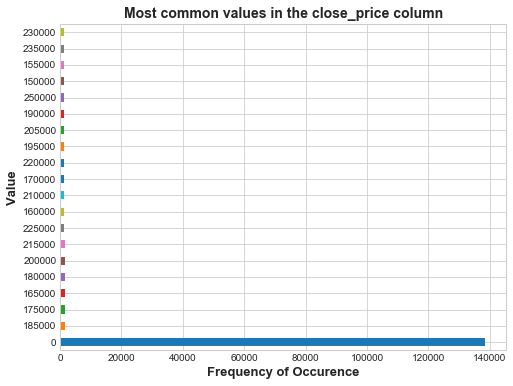


**************************************************

CLOSE_DATE

Data type: object
Number of unique values: 893
Number of nulls: 0 - 0.0%
count                  323864
unique                    893
top       1900-01-01 00:00:00
freq                   138451
Name: close_date, dtype: object



1900-01-01 00:00:00    138451
2017-01-01 00:00:00         6
2017-01-02 00:00:00        13
                        ...  
2019-06-14 00:00:00       373
2019-06-15 00:00:00         8
2019-06-16 00:00:00         2
Name: close_date, Length: 893, dtype: int64

None



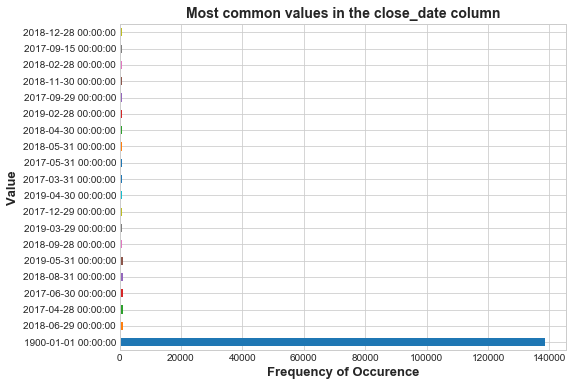


**************************************************

AREA

Data type: int64
Count: 323864
Number of Unique Values: 61
Number of nulls: 0 - 0.0%

Mean: 21.10999061334387
Minimum: 1
Lower Quartile: 10.0
Median: 20.0
Upper Quartile: 33.0
Maximum: 86


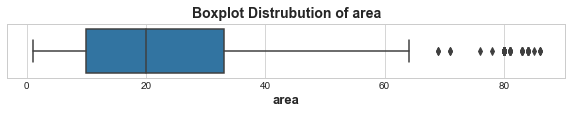

None



1     12837
10     7701
11     3151
      ...  
85        1
86        3
9     13084
Name: area, Length: 61, dtype: int64

None



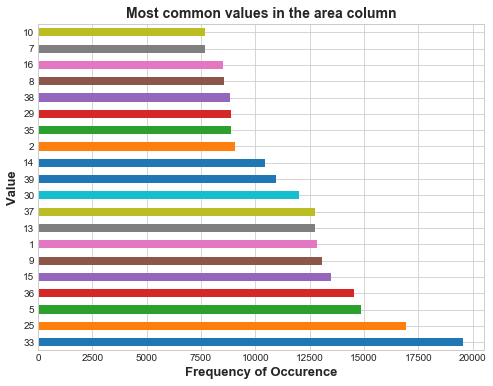


**************************************************

SCHOOL_DISTRICT

Data type: object
Number of unique values: 72
Number of nulls: 0 - 0.0%
count           323864
unique              72
top       27 - Houston
freq             56021
Name: school_district, dtype: object



1 - Aldine                 5572
10 - Columbia-Brazoria      337
100 - Cleveland             409
                          ...  
8 - Channelview             717
9 - Clear Creek           12575
99 - Other                   74
Name: school_district, Length: 72, dtype: int64

None



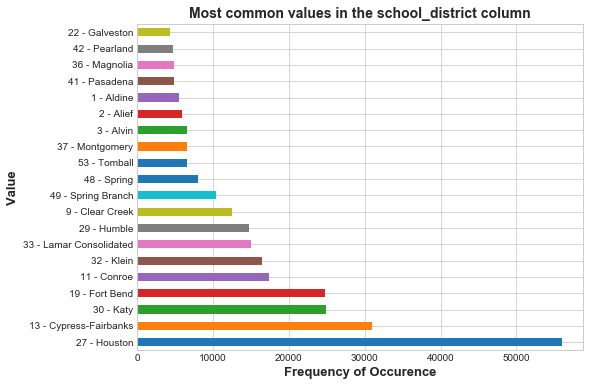


**************************************************

SCHOOL_ELEMENTARY

Data type: object
Number of unique values: 855
Number of nulls: 0 - 0.0%
count               323864
unique                 855
top       GISD OPEN ENROLL
freq                  4292
Name: school_elementary, dtype: object



A ROBISON ELEMENTARY SCHOOL            690
A.R. TURNER ELEMENTARY SCHOOL         1327
ADAM ELEMENTARY SCHOOL                 499
                                      ... 
YOUNG ELEMENTARY SCHOOL (HOUSTON)      309
YOUNG ELEMENTARY SCHOOL (PASADENA)      97
ZWINK ELEMENTARY SCHOOL                631
Name: school_elementary, Length: 855, dtype: int64

None



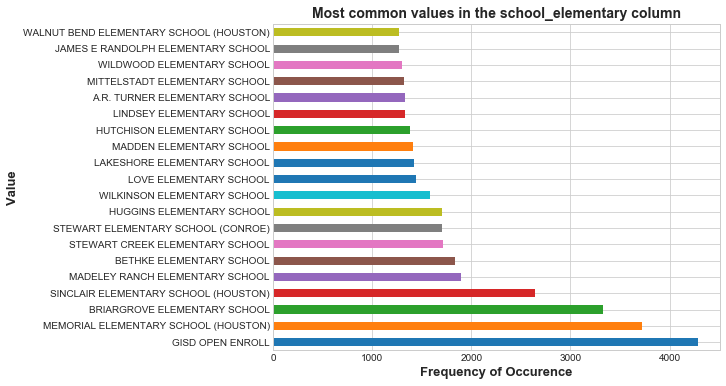


**************************************************

SCHOOL_MIDDLE

Data type: object
Number of unique values: 305
Number of nulls: 0 - 0.0%
count                           323864
unique                             305
top       HOGG MIDDLE SCHOOL (HOUSTON)
freq                              6191
Name: school_middle, dtype: object



ADAMS MIDDLE SCHOOL                  1
AGUIRRE JUNIOR HIGH                243
ALBRIGHT MIDDLE SCHOOL            1315
                                  ... 
WOODSON MIDDLE SCHOOL              248
WUNDERLICH INTERMEDIATE SCHOOL    1390
YORK JUNIOR HIGH SCHOOL           4660
Name: school_middle, Length: 305, dtype: int64

None



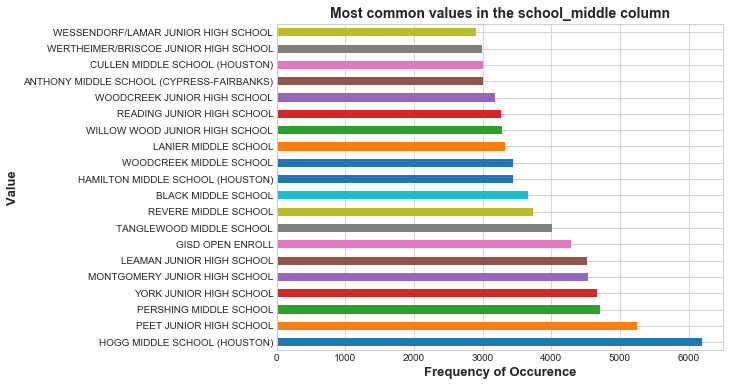


**************************************************

SCHOOL_HIGH

Data type: object
Number of unique values: 206
Number of nulls: 0 - 0.0%
count                          323864
unique                            206
top       LAMAR HIGH SCHOOL (HOUSTON)
freq                             9668
Name: school_high, dtype: object



AISD DRAW               5881
ALDINE HIGH SCHOOL       470
ALVIN HIGH SCHOOL       1547
                        ... 
WISDOM HIGH SCHOOL      5529
WORTHING HIGH SCHOOL    2162
YATES HIGH SCHOOL       1538
Name: school_high, Length: 206, dtype: int64

None



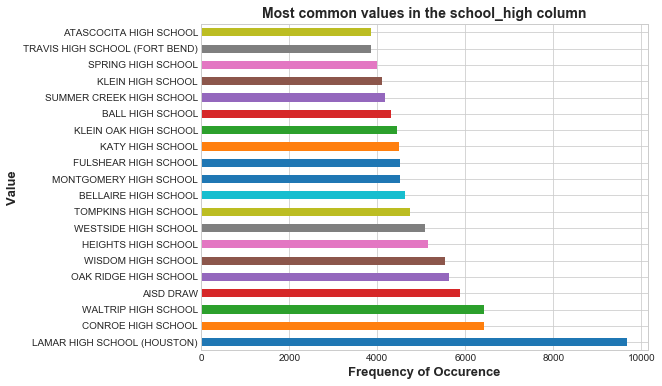


**************************************************

SQ_FT_TOTAL

Data type: float64
Count: 323864
Number of Unique Values: 6700
Number of nulls: 0 - 0.0%

Mean: 2530.67688597683
Minimum: 450.0
Lower Quartile: 1790.0
Median: 2354.0
Upper Quartile: 3062.0
Maximum: 217800.0


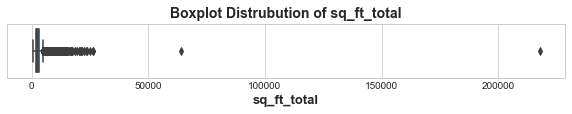

None



1000.0     116
10000.0      6
1001.0      36
          ... 
999.0       14
9997.0       2
9999.0       3
Name: sq_ft_total, Length: 6700, dtype: int64

None



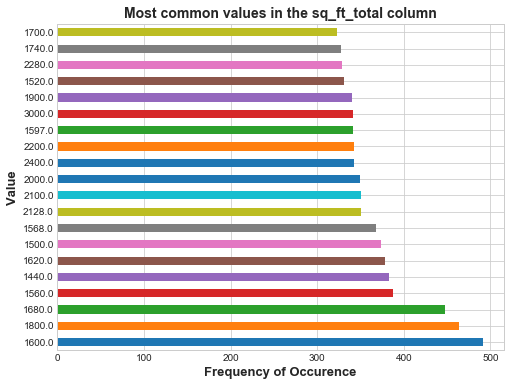


**************************************************

LOT_SIZE

Data type: float64
Count: 323864
Number of Unique Values: 29578
Number of nulls: 0 - 0.0%

Mean: 19730.220424622683
Minimum: 0.0
Lower Quartile: 6070.0
Median: 7800.0
Upper Quartile: 10337.25
Maximum: 999999999.0


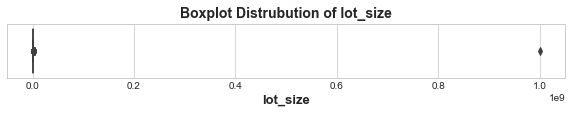

None



0.0            791
1.0              8
100.0            1
              ... 
9999.0          11
9999.4          18
999999999.0      1
Name: lot_size, Length: 29578, dtype: int64

None



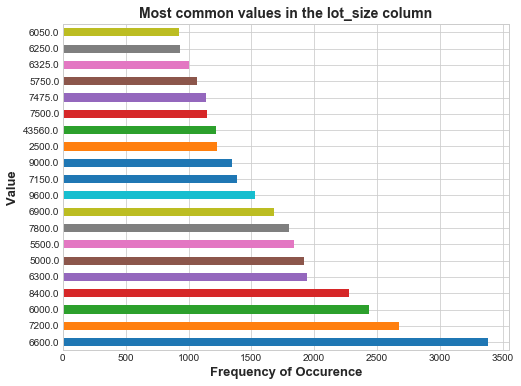


**************************************************

YEAR_BUILT

Data type: int64
Count: 323864
Number of Unique Values: 70
Number of nulls: 0 - 0.0%

Mean: 1997.0733270755625
Minimum: 1950
Lower Quartile: 1982.0
Median: 2003.0
Upper Quartile: 2013.0
Maximum: 2019


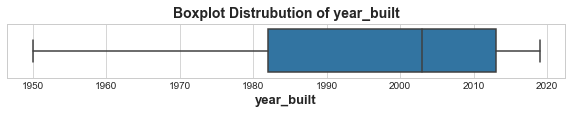

None



1950     2913
1951      544
1952     1097
        ...  
2017    19689
2018    20223
2019    10506
Name: year_built, Length: 70, dtype: int64

None



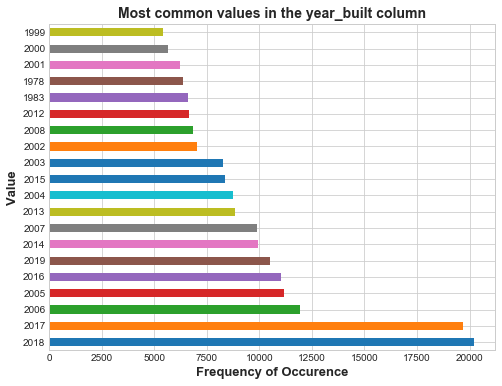


**************************************************

BEDROOMS

Data type: float64
Count: 323864
Number of Unique Values: 16
Number of nulls: 0 - 0.0%

Mean: 3.5570795148580885
Minimum: 1.0
Lower Quartile: 3.0
Median: 4.0
Upper Quartile: 4.0
Maximum: 30.0


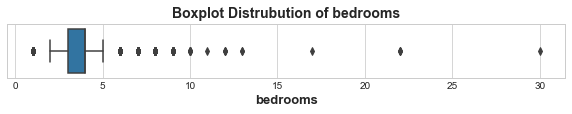

None



1.0     4219
10.0       7
11.0       1
        ... 
7.0      268
8.0       68
9.0       24
Name: bedrooms, Length: 16, dtype: int64

None



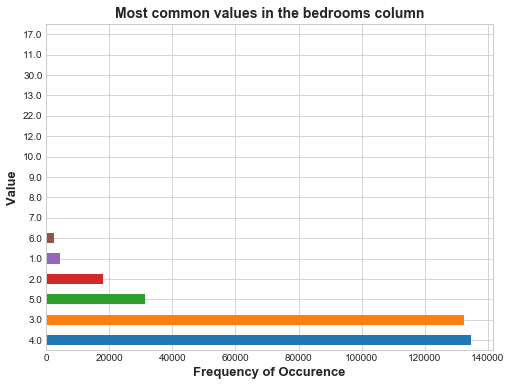


**************************************************

BATHS_FULL

Data type: float64
Count: 323864
Number of Unique Values: 15
Number of nulls: 0 - 0.0%

Mean: 2.4160727959884394
Minimum: 1.0
Lower Quartile: 2.0
Median: 2.0
Upper Quartile: 3.0
Maximum: 31.0


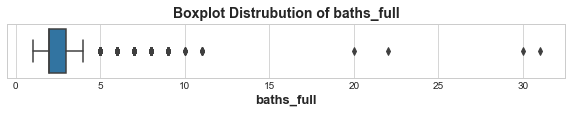

None



1.0     17885
10.0        4
11.0        6
        ...  
7.0       219
8.0        82
9.0        25
Name: baths_full, Length: 15, dtype: int64

None



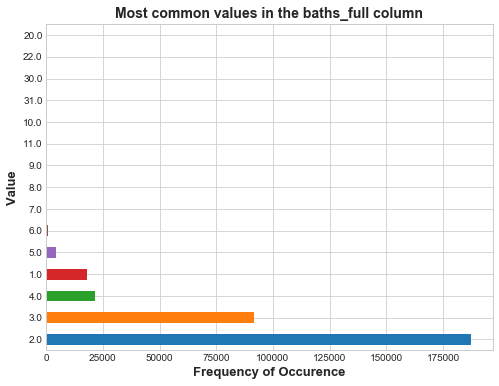


**************************************************

BATHS_HALF

Data type: float64
Count: 323864
Number of Unique Values: 9
Number of nulls: 0 - 0.0%

Mean: 0.5784773855692513
Minimum: 0.0
Lower Quartile: 0.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 10.0


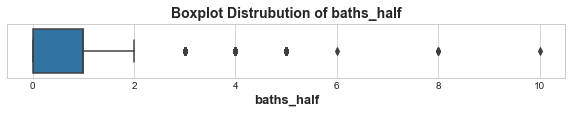

None



0.0     146370
1.0     168624
10.0         1
         ...  
5.0         36
6.0          1
8.0          3
Name: baths_half, Length: 9, dtype: int64

None



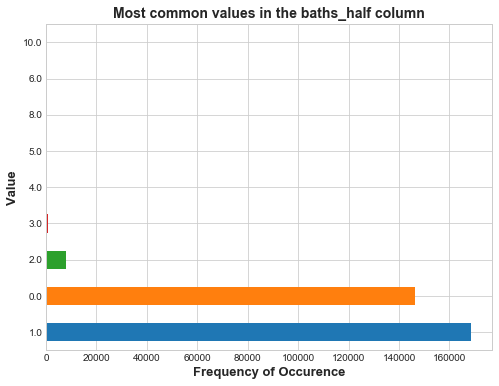


**************************************************

STORIES

Data type: float64
Count: 323864
Number of Unique Values: 7
Number of nulls: 0 - 0.0%

Mean: 1.6013172195736483
Minimum: 1.0
Lower Quartile: 1.0
Median: 2.0
Upper Quartile: 2.0
Maximum: 4.0


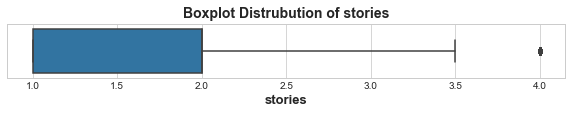

None



1.0    145182
1.5      7777
2.0    153086
        ...  
3.0     15210
3.5        29
4.0      2272
Name: stories, Length: 7, dtype: int64

None



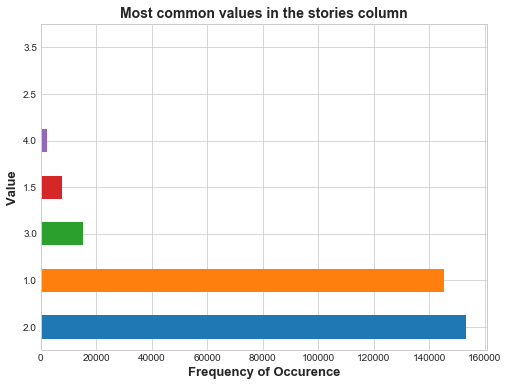


**************************************************

NEW_CONSTRUCTION

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top        False
freq      266587
Name: new_construction, dtype: object



False    266587
True      57277
Name: new_construction, dtype: int64

None



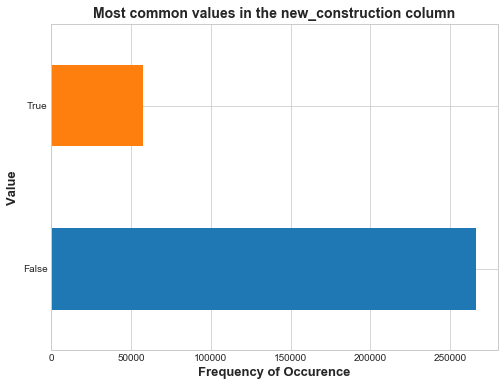


**************************************************

NEW_CONSTRUCTION_DESC

Data type: object
Number of unique values: 3
Number of nulls: 0 - 0.0%
count      323864
unique          3
top       Not New
freq       266587
Name: new_construction_desc, dtype: object



Never Lived In                     22342
Not New                           266587
To Be Built/Under Construction     34935
Name: new_construction_desc, dtype: int64

None



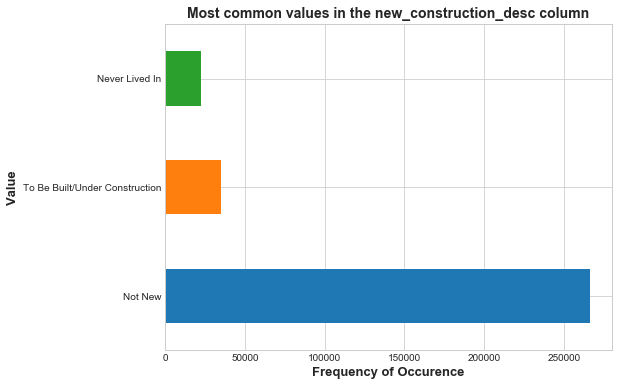


**************************************************

POOL_PRIVATE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top        False
freq      285264
Name: pool_private, dtype: object



False    285264
True      38600
Name: pool_private, dtype: int64

None



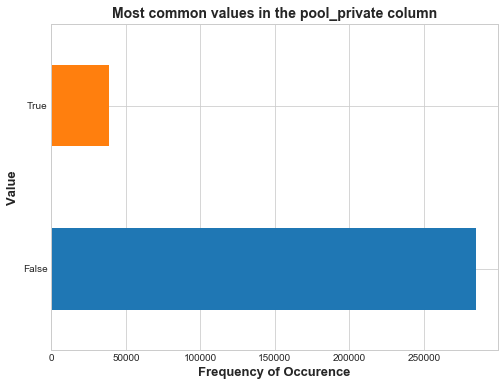


**************************************************

DOM

Data type: float64
Count: 323864
Number of Unique Values: 831
Number of nulls: 0 - 0.0%

Mean: 68.41165427463379
Minimum: -54.0
Lower Quartile: 13.0
Median: 42.0
Upper Quartile: 96.0
Maximum: 1541.0


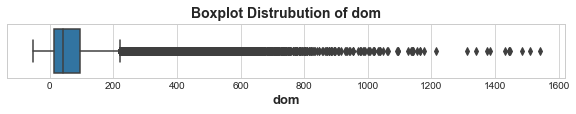

None



-1.0       5
-28.0      1
-54.0      1
        ... 
987.0      1
99.0     999
990.0      1
Name: dom, Length: 831, dtype: int64

None



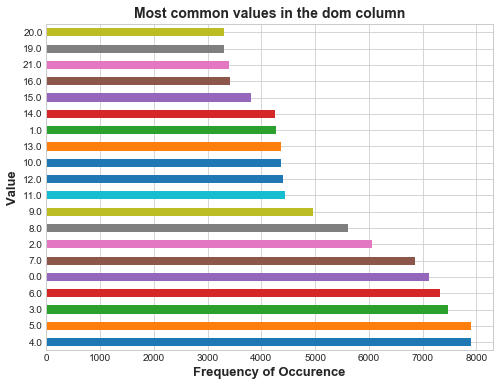


**************************************************

CDOM

Data type: int64
Count: 323864
Number of Unique Values: 1337
Number of nulls: 0 - 0.0%

Mean: 104.5921096509646
Minimum: 0
Lower Quartile: 16.0
Median: 60.0
Upper Quartile: 143.0
Maximum: 1600


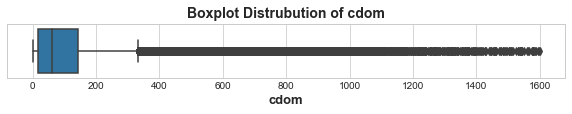

None



0      6060
1      3728
10     3733
       ... 
997       4
998       1
999       3
Name: cdom, Length: 1337, dtype: int64

None



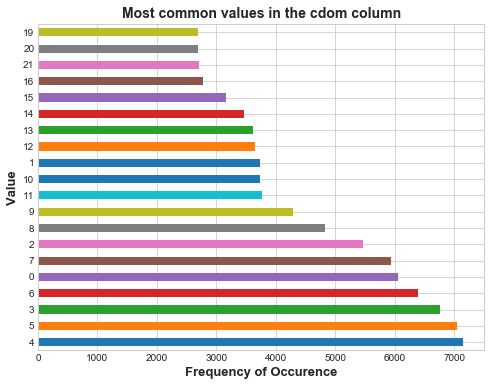


**************************************************

LAST_CHANGE_TIMESTAMP

Data type: object
Number of unique values: 298554
Number of nulls: 0 - 0.0%
count                  323864
unique                 298554
top       2017-11-01 00:30:02
freq                      207
Name: last_change_timestamp, dtype: object



2015-10-15 07:34:47    1
2015-10-22 09:06:18    1
2015-11-16 09:24:58    1
                      ..
2019-06-20 00:16:02    1
2019-06-20 00:25:59    1
2019-06-20 00:29:08    1
Name: last_change_timestamp, Length: 298554, dtype: int64

None



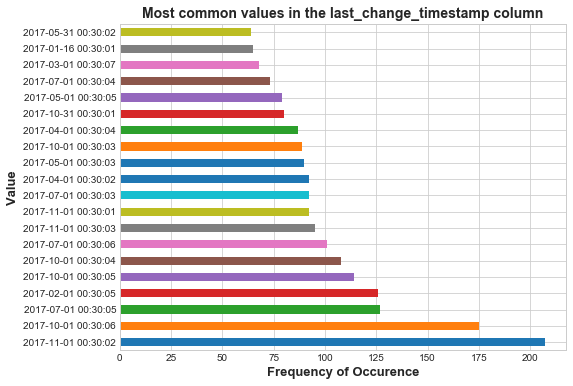


**************************************************

LIST_DATE

Data type: object
Number of unique values: 1582
Number of nulls: 0 - 0.0%
count                  323864
unique                   1582
top       2018-06-01 00:00:00
freq                      692
Name: list_date, dtype: object



2002-10-22 00:00:00      1
2008-08-11 00:00:00      1
2009-01-06 00:00:00      1
                      ... 
2019-06-18 00:00:00    410
2019-06-19 00:00:00    454
2019-06-20 00:00:00      6
Name: list_date, Length: 1582, dtype: int64

None



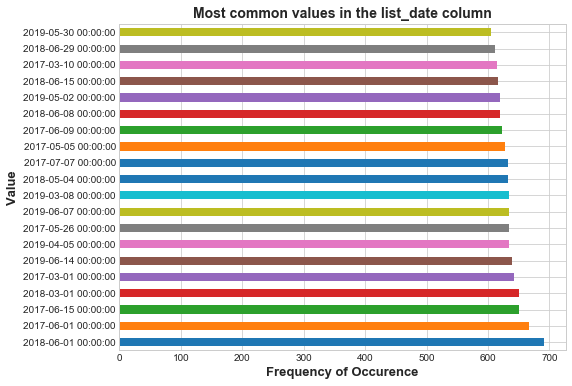


**************************************************

FIREPLACE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top         True
freq      204263
Name: fireplace, dtype: object



False    119601
True     204263
Name: fireplace, dtype: int64

None



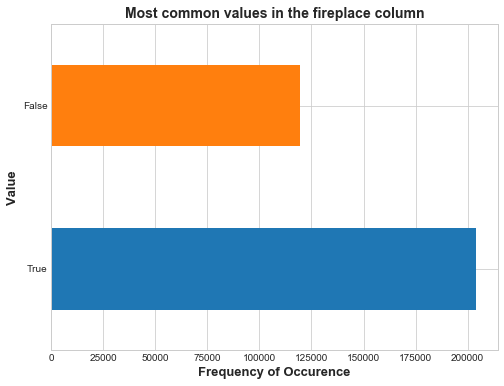


**************************************************

GARAGE

Data type: bool
Number of unique values: 2
Number of nulls: 0 - 0.0%
count     323864
unique         2
top         True
freq      296047
Name: garage, dtype: object



False     27817
True     296047
Name: garage, dtype: int64

None



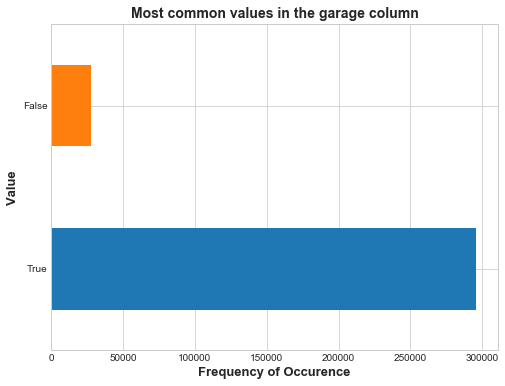


**************************************************



In [10]:
preview_cols(df)

In [11]:
view(df,1)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,dom,cdom,last_change_timestamp,list_date,fireplace,garage
3,47405549,Single-Family,Sold,723,Broadway,Winnie,77665,Chambers,39900,25000,2017-09-20 00:00:00,53,18 - East Chambers,EAST CHAMBERS ELEMENTARY SCHOOL,EAST CHAMBERS J H,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,1.0,False,Not New,False,0.0,123,2017-09-21 14:59:24,2017-08-23 00:00:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371432,10817804,Single-Family,Withdrawn,314,Hunters Trail,Houston,77024,Harris,5999900,0,1900-01-01 00:00:00,23,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,27958.0,2019,6.0,6.0,3.0,2.0,True,To Be Built/Under Construction,False,71.0,106,2019-06-04 10:00:42,2019-03-25 00:00:00,True,True


## Fix data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323864 entries, 3 to 371432
Data columns (total 32 columns):
mls_number               323864 non-null int64
property_type            323864 non-null object
status                   323864 non-null object
street_number            323864 non-null object
street_name              323864 non-null object
city                     323864 non-null object
zip_code                 323864 non-null int64
county                   323864 non-null object
list_price               323864 non-null int64
close_price              323864 non-null int64
close_date               323864 non-null object
area                     323864 non-null int64
school_district          323864 non-null object
school_elementary        323864 non-null object
school_middle            323864 non-null object
school_high              323864 non-null object
sq_ft_total              323864 non-null float64
lot_size                 323864 non-null float64
year_built               323

### Bool to Int

In [13]:
for i in df.columns:
    if df[i].dtype=='bool':
        df[i] = df[i].astype('int')

### Dates

In [14]:
df.close_date = pd.to_datetime(df.close_date)
df.last_change_timestamp = pd.to_datetime(df.last_change_timestamp)
df.list_date = pd.to_datetime(df.list_date)

In [15]:
df.close_date.dt.year.value_counts().sort_index()

1900    138451
2017     74441
2018     77491
2019     33481
Name: close_date, dtype: int64

In [16]:
df.last_change_timestamp.dt.year.value_counts().sort_index()

2015         4
2016        15
2017    112591
2018    119480
2019     91774
Name: last_change_timestamp, dtype: int64

In [17]:
df.list_date.dt.year.value_counts().sort_index()

2002         1
2008         1
2009         2
2010         1
2011         1
2012         2
2013        17
2014        68
2015       526
2016     25306
2017    116997
2018    119438
2019     61504
Name: list_date, dtype: int64

In [18]:
view(df,3)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,dom,cdom,last_change_timestamp,list_date,fireplace,garage
3,47405549,Single-Family,Sold,723,Broadway,Winnie,77665,Chambers,39900,25000,2017-09-20,53,18 - East Chambers,EAST CHAMBERS ELEMENTARY SCHOOL,EAST CHAMBERS J H,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,1.0,0,Not New,0,0.0,123,2017-09-21 14:59:24,2017-08-23,0,0
4,86143414,Townhouse/Condo,Sold,"7 A,B & H",Dana,Galveston,77554,Galveston,25000,25000,2017-09-11,33,22 - Galveston,GISD OPEN ENROLL,GISD OPEN ENROLL,BALL HIGH SCHOOL,801.0,2242.8,1984,1.0,1.0,0.0,2.0,0,Not New,0,49.0,49,2017-09-11 15:43:04,2017-07-07,1,1
6,99874455,Townhouse/Condo,Sold,13151,Walden,Montgomery,77356,Montgomery,36000,36000,2017-09-29,39,37 - Montgomery,MADELEY RANCH ELEMENTARY SCHOOL,MONTGOMERY JUNIOR HIGH SCHOOL,MONTGOMERY HIGH SCHOOL,489.0,1956.0,1979,1.0,1.0,0.0,1.0,0,Not New,0,86.0,86,2017-09-29 13:35:36,2017-06-02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371429,56912411,Single-Family,Withdrawn,16702,Bridle Oak,Cypress,77433,Harris,4989000,0,1900-01-01,35,13 - Cypress-Fairbanks,KEITH ELEMENTARY SCHOOL,SALYARDS MIDDLE SCHOOL,BRIDGELAND HIGH SCHOOL,9784.0,958320.0,2006,6.0,6.0,3.0,2.0,0,Not New,1,240.0,240,2019-04-11 13:17:58,2018-08-14,1,1
371431,40170341,Single-Family,Withdrawn,8818,Sandringham,Houston,77024,Harris,5250000,0,1900-01-01,23,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),7007.0,75520.0,1957,6.0,5.0,1.0,1.0,0,Not New,1,34.0,34,2019-05-01 12:17:00,2019-01-25,1,0
371432,10817804,Single-Family,Withdrawn,314,Hunters Trail,Houston,77024,Harris,5999900,0,1900-01-01,23,49 - Spring Branch,HUNTERS CREEK ELEMENTARY SCHOOL,SPRING BRANCH MIDDLE SCHOOL (SPRING BRANCH),MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,27958.0,2019,6.0,6.0,3.0,2.0,1,To Be Built/Under Construction,0,71.0,106,2019-06-04 10:00:42,2019-03-25,1,1


# EDA

In [19]:
df_save = df.copy(deep=True)

I will add columns for list price per sqft and close price per sqft for my analysis.

In [20]:
df['list_ppsqft'] = df.list_price/df.sq_ft_total
df['close_ppsqft'] = df.close_price/df.sq_ft_total

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mls_number,323864.0,5.048948e+07,2.818522e+07,104240.000000,2.616190e+07,5.037591e+07,7.484777e+07,3.382184e+08
zip_code,323864.0,7.730930e+04,1.991048e+02,77002.000000,7.707700e+04,7.737700e+04,7.747100e+04,7.895000e+04
list_price,323864.0,3.380528e+05,3.415473e+05,20000.000000,1.899000e+05,2.649000e+05,3.799000e+05,3.000000e+07
close_price,323864.0,1.615131e+05,2.240112e+05,0.000000,0.000000e+00,1.400000e+05,2.499000e+05,1.750000e+07
area,323864.0,2.110999e+01,1.281462e+01,1.000000,1.000000e+01,2.000000e+01,3.300000e+01,8.600000e+01
sq_ft_total,323864.0,2.530677e+03,1.149833e+03,450.000000,1.790000e+03,2.354000e+03,3.062000e+03,2.178000e+05
lot_size,323864.0,1.973022e+04,1.757913e+06,0.000000,6.070000e+03,7.800000e+03,1.033725e+04,1.000000e+09
year_built,323864.0,1.997073e+03,1.870609e+01,1950.000000,1.982000e+03,2.003000e+03,2.013000e+03,2.019000e+03
bedrooms,323864.0,3.557080e+00,8.381068e-01,1.000000,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+01
baths_full,323864.0,2.416073e+00,7.942564e-01,1.000000,2.000000e+00,2.000000e+00,3.000000e+00,3.100000e+01


### DOM vs. CDOM

According to the [Central Texas MLS](https://ctxmls.com/faq/difference-dom-cdom/), this is the difference between DOM and CDOM:

**DOM - Days on the Market:** the number of consecutive days a property has been listed in the MLS by a listing agent. This indicator will change when a listing expires and a different agent lists the property. If a property is listed and then terminated by expiration or other means, and the property is not relisted for 90 days or more, the DOM will be reset to 0.

**CDOM - Cumulative Days on the Market:** the number of consecutive days a property has been listed regardless of listing agent. The CDOM marker goes with the property not the agent. The number of days shown in the CDOM is only reset to "0" if a property is removed from the market and is not listed again for more than 120 days.

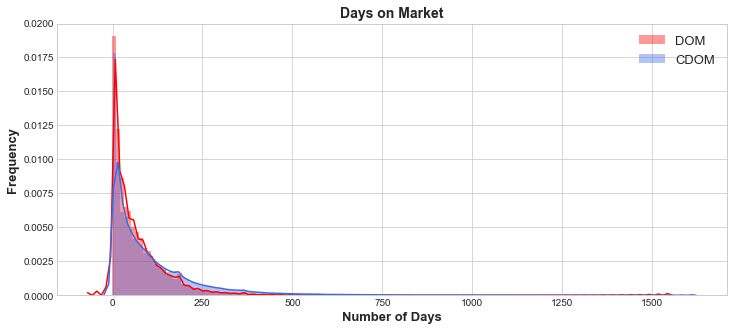

In [22]:
plt.figure(figsize=(12,5))
sns.distplot(df.dom, bins=150, label="DOM", color='red')
sns.distplot(df.cdom, bins=150, label="CDOM", color='royalblue')
plt.title("Days on Market", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.xlabel("Number of Days", fontsize=13, fontweight='bold')
plt.legend(fontsize=13)
plt.show()

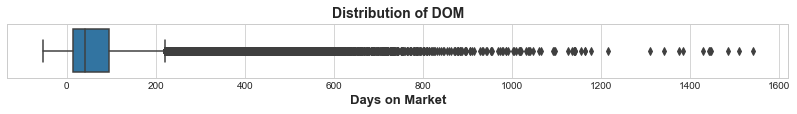

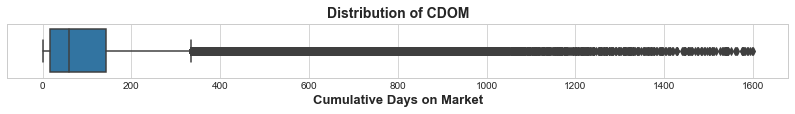

In [23]:
plt.figure(figsize=(14,1))
sns.boxplot(df.dom)
plt.title('Distribution of DOM', fontsize=14, fontweight='bold')
plt.xlabel('Days on Market', fontsize=13, fontweight='bold')
plt.show()

plt.figure(figsize=(14,1))
sns.boxplot(df.cdom)
plt.title('Distribution of CDOM', fontsize=14, fontweight='bold')
plt.xlabel('Cumulative Days on Market', fontsize=13, fontweight='bold')
plt.show()

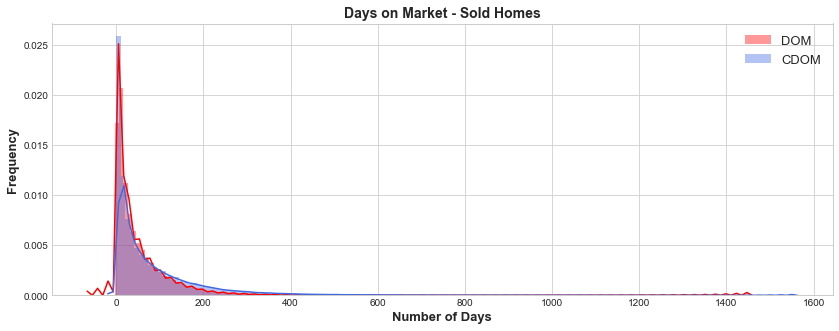

In [24]:
plt.figure(figsize=(14,5))
sns.distplot(df[df.status=='Sold'].dom, bins=150, label="DOM", color='red')
sns.distplot(df[df.status=='Sold'].cdom, bins=150, label="CDOM", color='royalblue')
plt.title("Days on Market - Sold Homes", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.xlabel("Number of Days", fontsize=13, fontweight='bold')
plt.legend(fontsize=13)
plt.show()

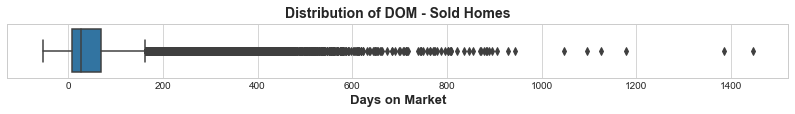

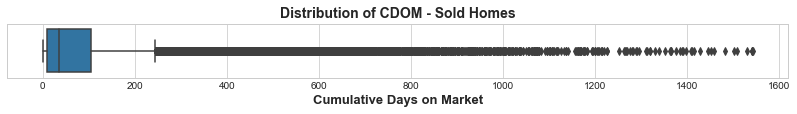

In [25]:
plt.figure(figsize=(14,1))
sns.boxplot(df[df.status=='Sold'].dom)
plt.title('Distribution of DOM - Sold Homes', fontsize=14, fontweight='bold')
plt.xlabel('Days on Market', fontsize=13, fontweight='bold')
plt.show()

plt.figure(figsize=(14,1))
sns.boxplot(df[df.status=='Sold'].cdom)
plt.title('Distribution of CDOM - Sold Homes', fontsize=14, fontweight='bold')
plt.xlabel('Cumulative Days on Market', fontsize=13, fontweight='bold')
plt.show()

For our purposes, the CDOM will provide us with information more useful to our study, as we are not considering any information regarding listing agents. I will remove the DOM column.

In [26]:
df.drop(columns='dom', inplace=True)

## Break down by status

In [27]:
df.status.value_counts()

Sold                 185413
Terminated            69270
Expired               30932
Active                23934
Pending                8148
Withdrawn              2806
Option Pending         2108
Pend Cont to Show      1253
Name: status, dtype: int64

In [28]:
sold = df[df.status=='Sold']
terminated = df[df.status=='Terminated']
expired = df[df.status=='Expired']
active = df[df.status=='Active']
pending = df[df.status=='Pending']
withdrawn = df[df.status=='Withdrawn']
opt_pending = df[df.status=='Option Pending']
pend_cont = df[df.status=='Pend Cont to Show']

### New Constructions

In [29]:
print(f'The number of new constructions is {len(df[df.new_construction==1])}, {round(len(df[df.new_construction==1])/len(df),2)*100}% of the total listings.')

The number of new constructions is 57277, 18.0% of the total listings.


In [30]:
new_cons = df[df.new_construction==1]

MLS_NUMBER

Data type: int64
Count: 57277
Number of Unique Values: 57277
Number of nulls: 0 - 0.0%

Mean: 50578035.87043665
Minimum: 108131
Lower Quartile: 26250752.0
Median: 50604361.0
Upper Quartile: 74838503.0
Maximum: 107100381


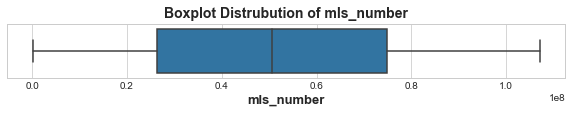

None



10002648    1
10003539    1
10003643    1
           ..
99998249    1
99999204    1
9999959     1
Name: mls_number, Length: 57277, dtype: int64

None



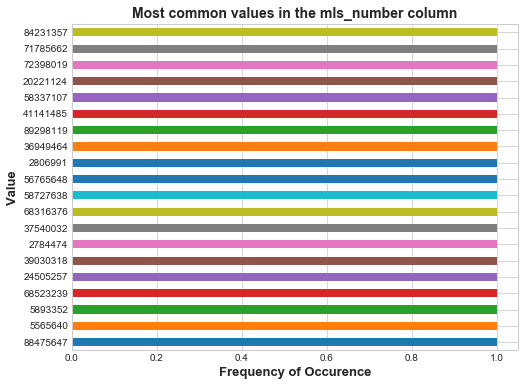


**************************************************

PROPERTY_TYPE

Data type: object
Number of unique values: 4
Number of nulls: 0 - 0.0%
count             57277
unique                4
top       Single-Family
freq              54983
Name: property_type, dtype: object



Mid/Hi-Rise Condo        4
Multi-Family             1
Single-Family        54983
Townhouse/Condo       2289
Name: property_type, dtype: int64

None



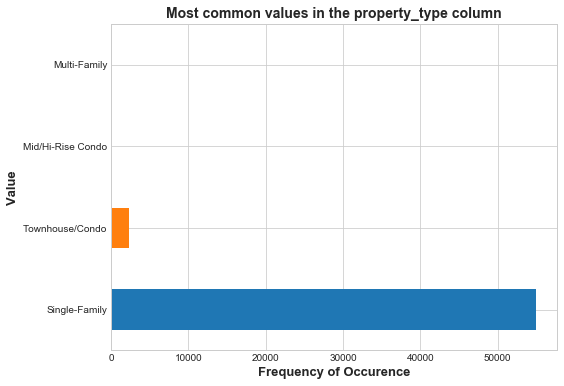


**************************************************

STATUS

Data type: object
Number of unique values: 8
Number of nulls: 0 - 0.0%
count     57277
unique        8
top        Sold
freq      33019
Name: status, dtype: object



Active             5871
Expired            3236
Option Pending       67
                  ...  
Sold              33019
Terminated        12107
Withdrawn           167
Name: status, Length: 8, dtype: int64

None



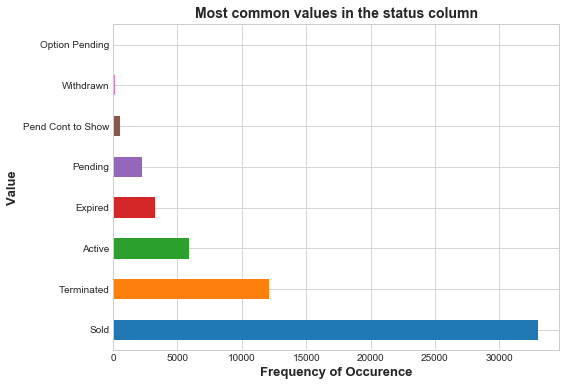


**************************************************

STREET_NUMBER

Data type: object
Number of unique values: 12273
Number of nulls: 0 - 0.0%
count     57277
unique    12273
top        2401
freq         85
Name: street_number, dtype: object



0          39
00          6
000         4
           ..
Lot 9       3
S614300     1
TBD         1
Name: street_number, Length: 12273, dtype: int64

None



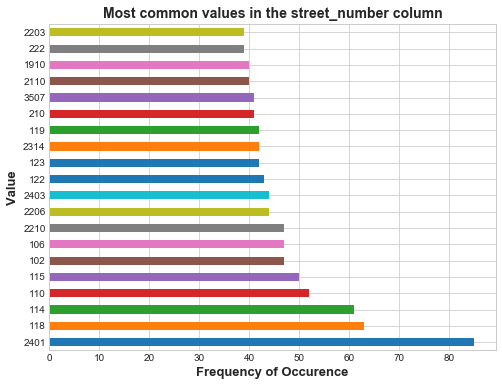


**************************************************

STREET_NAME

Data type: object
Number of unique values: 10972
Number of nulls: 0 - 0.0%
count     57277
unique    10972
top        24th
freq        103
Name: street_name, dtype: object



10 1/2               3
100 Pineview         1
10th                 9
                    ..
way street           1
west 26th Street     1
white pearl court    1
Name: street_name, Length: 10972, dtype: int64

None



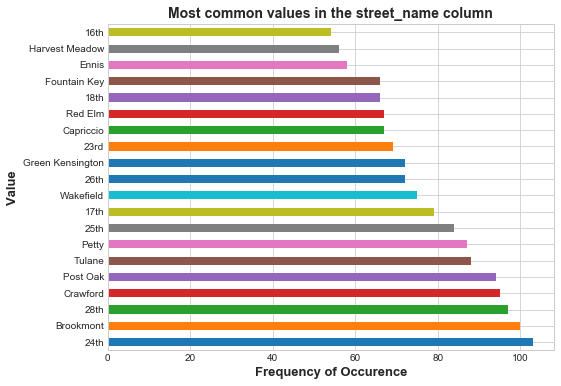


**************************************************

CITY

Data type: object
Number of unique values: 74
Number of nulls: 0 - 0.0%
count       57277
unique         74
top       Houston
freq        16495
Name: city, dtype: object



Alvin            196
Anahuac            1
Angleton         101
                ... 
Webster           57
West Columbia     49
Willis           382
Name: city, Length: 74, dtype: int64

None



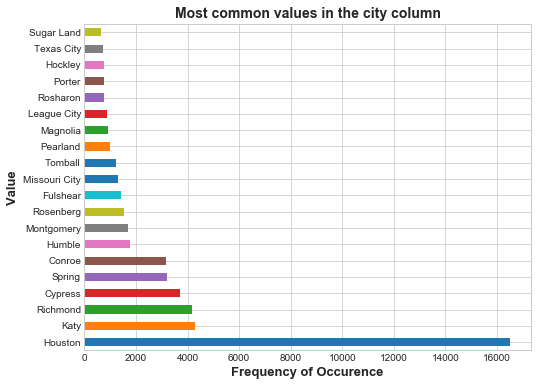


**************************************************

ZIP_CODE

Data type: int64
Count: 57277
Number of Unique Values: 204
Number of nulls: 0 - 0.0%

Mean: 77321.30614382736
Minimum: 77003
Lower Quartile: 77080.0
Median: 77386.0
Upper Quartile: 77469.0
Maximum: 78950


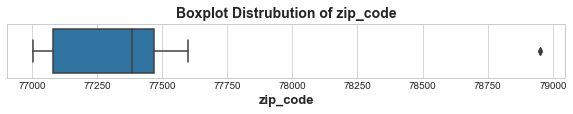

None



77003    589
77004    683
77005     98
        ... 
77591    246
77598     57
78950      2
Name: zip_code, Length: 204, dtype: int64

None



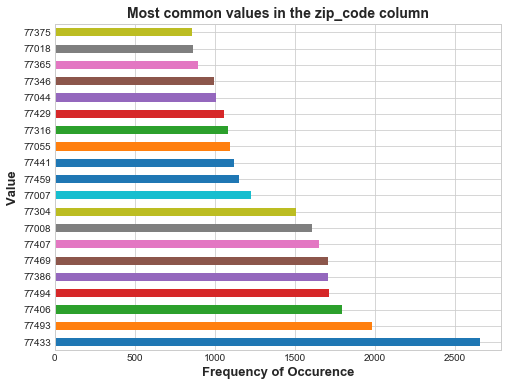


**************************************************

COUNTY

Data type: object
Number of unique values: 9
Number of nulls: 0 - 0.0%
count      57277
unique         9
top       Harris
freq       29243
Name: county, dtype: object



Austin          44
Brazoria      2415
Chambers       542
              ... 
Liberty        212
Montgomery    9620
Waller         988
Name: county, Length: 9, dtype: int64

None



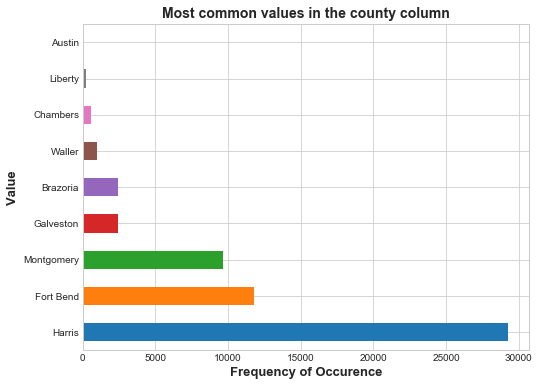


**************************************************

LIST_PRICE

Data type: int64
Count: 57277
Number of Unique Values: 19911
Number of nulls: 0 - 0.0%

Mean: 404643.103846221
Minimum: 27980
Lower Quartile: 249000.0
Median: 324950.0
Upper Quartile: 428000.0
Maximum: 14500000


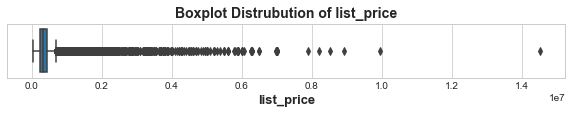

None



100000      5
1000000    11
1000900     2
           ..
999990      2
999995      4
999999      8
Name: list_price, Length: 19911, dtype: int64

None



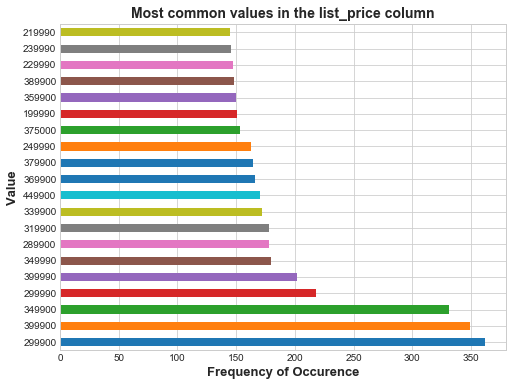


**************************************************

CLOSE_PRICE

Data type: int64
Count: 57277
Number of Unique Values: 14244
Number of nulls: 0 - 0.0%

Mean: 200651.30895472877
Minimum: 0
Lower Quartile: 0.0
Median: 204900.0
Upper Quartile: 320576.0
Maximum: 8480000


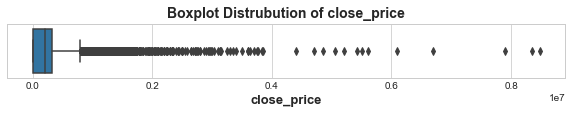

None



0          24258
100000         2
1000000        4
           ...  
999900         2
999995         1
999999         2
Name: close_price, Length: 14244, dtype: int64

None



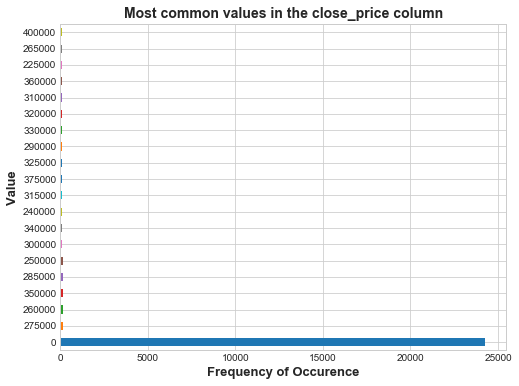


**************************************************

CLOSE_DATE

Data type: datetime64[ns]
Number of unique values: 790
Number of nulls: 0 - 0.0%
count                   57277
unique                    790
top       1900-01-01 00:00:00
freq                    24258
first     1900-01-01 00:00:00
last      2019-06-16 00:00:00
Name: close_date, dtype: object



1900-01-01    24258
2017-01-01        2
2017-01-02        6
              ...  
2019-06-13       21
2019-06-14       55
2019-06-16        2
Name: close_date, Length: 790, dtype: int64

None



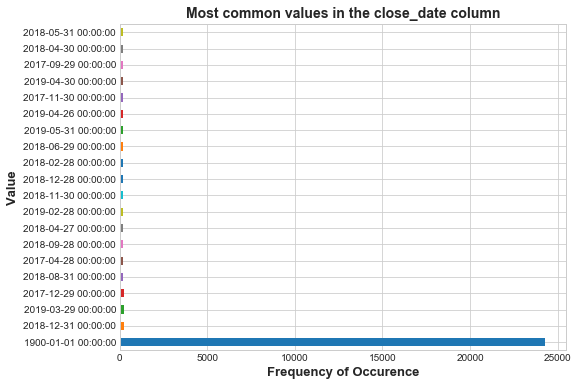


**************************************************

AREA

Data type: int64
Count: 57277
Number of Unique Values: 50
Number of nulls: 0 - 0.0%

Mean: 22.46053389667755
Minimum: 1
Lower Quartile: 11.0
Median: 25.0
Upper Quartile: 35.0
Maximum: 84


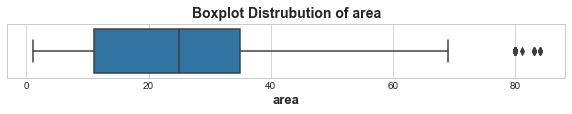

None



1     2637
10     276
11     332
      ... 
83       6
84       5
9     4357
Name: area, Length: 50, dtype: int64

None



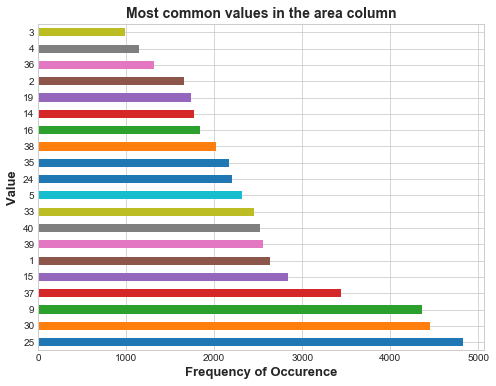


**************************************************

SCHOOL_DISTRICT

Data type: object
Number of unique values: 60
Number of nulls: 0 - 0.0%
count            57277
unique              60
top       27 - Houston
freq             10779
Name: school_district, dtype: object



1 - Aldine                 748
10 - Columbia-Brazoria      55
100 - Cleveland             30
                          ... 
8 - Channelview             75
9 - Clear Creek           1177
99 - Other                   5
Name: school_district, Length: 60, dtype: int64

None



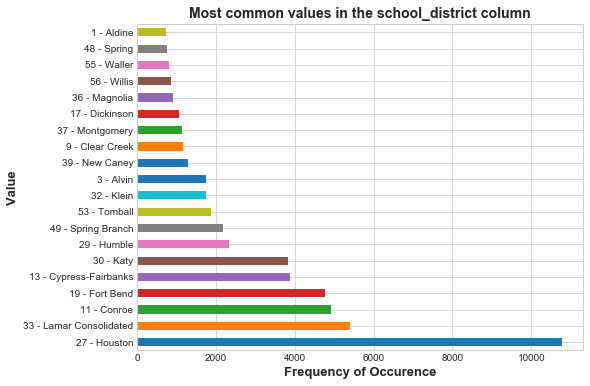


**************************************************

SCHOOL_ELEMENTARY

Data type: object
Number of unique values: 696
Number of nulls: 0 - 0.0%
count                        57277
unique                         696
top       BETHKE ELEMENTARY SCHOOL
freq                          1205
Name: school_elementary, dtype: object



A ROBISON ELEMENTARY SCHOOL           51
A.R. TURNER ELEMENTARY SCHOOL        476
ADOLPHUS ELEMENTARY SCHOOL           178
                                    ... 
YORK ELEMENTARY SCHOOL               253
YOUNG ELEMENTARY SCHOOL (HOUSTON)    230
ZWINK ELEMENTARY SCHOOL               46
Name: school_elementary, Length: 696, dtype: int64

None



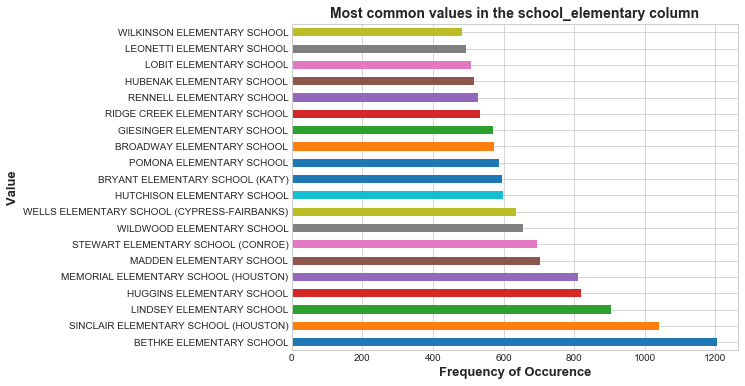


**************************************************

SCHOOL_MIDDLE

Data type: object
Number of unique values: 278
Number of nulls: 0 - 0.0%
count                         57277
unique                          278
top       LEAMAN JUNIOR HIGH SCHOOL
freq                           2230
Name: school_middle, dtype: object



ADAMS MIDDLE SCHOOL                  1
AGUIRRE JUNIOR HIGH                 39
ALBRIGHT MIDDLE SCHOOL             100
                                  ... 
WOODSON MIDDLE SCHOOL               38
WUNDERLICH INTERMEDIATE SCHOOL     110
YORK JUNIOR HIGH SCHOOL           1627
Name: school_middle, Length: 278, dtype: int64

None



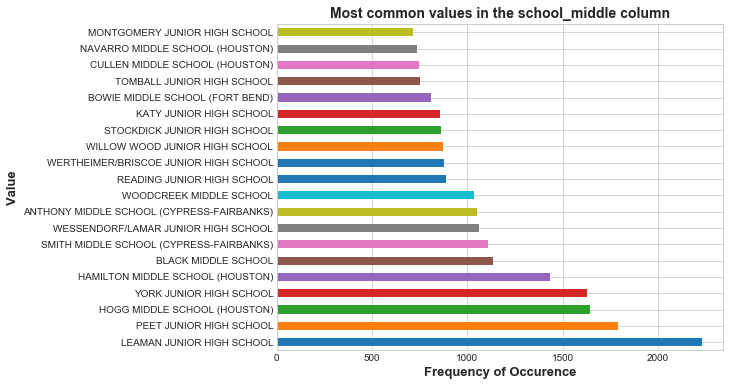


**************************************************

SCHOOL_HIGH

Data type: object
Number of unique values: 189
Number of nulls: 0 - 0.0%
count                  57277
unique                   189
top       CONROE HIGH SCHOOL
freq                    2236
Name: school_high, dtype: object



AISD DRAW               248
ALDINE HIGH SCHOOL        7
ALVIN HIGH SCHOOL       249
                       ... 
WISDOM HIGH SCHOOL      310
WORTHING HIGH SCHOOL    562
YATES HIGH SCHOOL       450
Name: school_high, Length: 189, dtype: int64

None



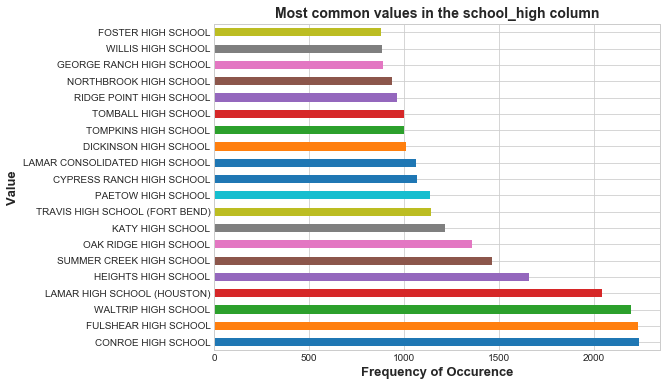


**************************************************

SQ_FT_TOTAL

Data type: float64
Count: 57277
Number of Unique Values: 4142
Number of nulls: 0 - 0.0%

Mean: 2656.2442341603087
Minimum: 468.0
Lower Quartile: 2018.0
Median: 2504.0
Upper Quartile: 3119.0
Maximum: 25229.0


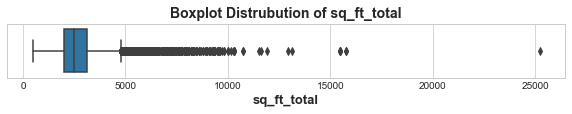

None



1000.0     5
1001.0    11
1002.0     2
          ..
992.0      1
995.0      1
9997.0     2
Name: sq_ft_total, Length: 4142, dtype: int64

None



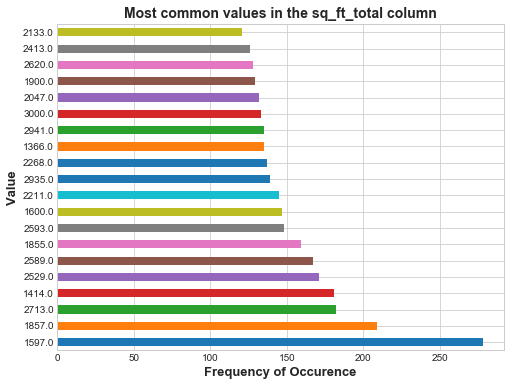


**************************************************

LOT_SIZE

Data type: float64
Count: 57277
Number of Unique Values: 11650
Number of nulls: 0 - 0.0%

Mean: 8245.760678806502
Minimum: 0.0
Lower Quartile: 5550.0
Median: 7274.4
Upper Quartile: 9165.0
Maximum: 871200.0


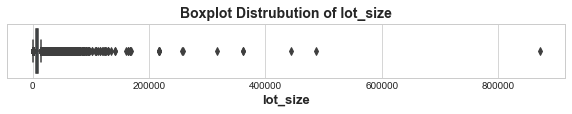

None



0.0       30
1.0        2
1000.0     1
          ..
9998.8     1
9999.0     1
9999.4    18
Name: lot_size, Length: 11650, dtype: int64

None



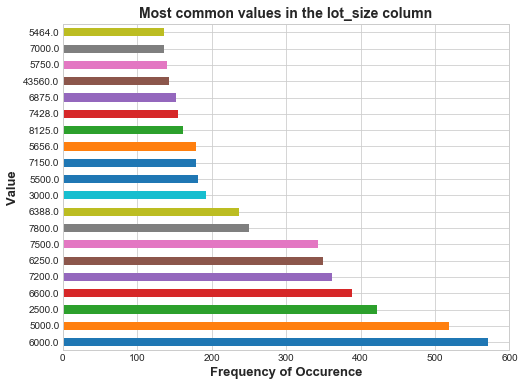


**************************************************

YEAR_BUILT

Data type: int64
Count: 57277
Number of Unique Values: 27
Number of nulls: 0 - 0.0%

Mean: 2017.5075510239712
Minimum: 1950
Lower Quartile: 2017.0
Median: 2018.0
Upper Quartile: 2018.0
Maximum: 2019


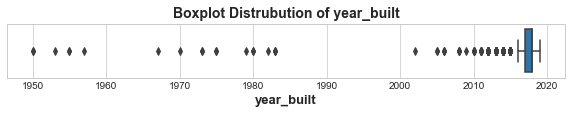

None



1950        2
1953        1
1955        2
        ...  
2017    18120
2018    19864
2019    10485
Name: year_built, Length: 27, dtype: int64

None



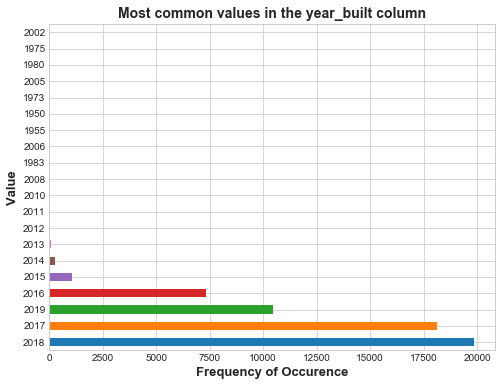


**************************************************

BEDROOMS

Data type: float64
Count: 57277
Number of Unique Values: 9
Number of nulls: 0 - 0.0%

Mean: 3.680796829442883
Minimum: 1.0
Lower Quartile: 3.0
Median: 4.0
Upper Quartile: 4.0
Maximum: 9.0


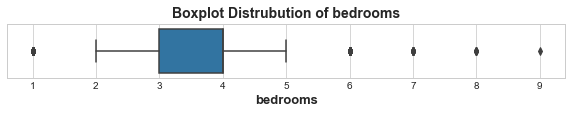

None



1.0       49
2.0      880
3.0    22598
       ...  
7.0       17
8.0        7
9.0        1
Name: bedrooms, Length: 9, dtype: int64

None



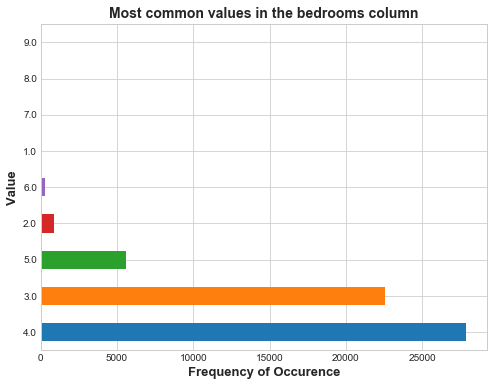


**************************************************

BATHS_FULL

Data type: float64
Count: 57277
Number of Unique Values: 11
Number of nulls: 0 - 0.0%

Mean: 2.705658466749306
Minimum: 1.0
Lower Quartile: 2.0
Median: 3.0
Upper Quartile: 3.0
Maximum: 31.0


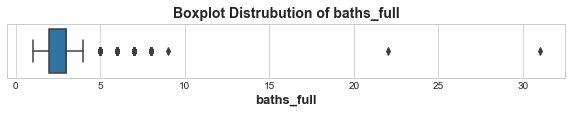

None



1.0       116
2.0     25496
22.0        1
        ...  
7.0        37
8.0        23
9.0         1
Name: baths_full, Length: 11, dtype: int64

None



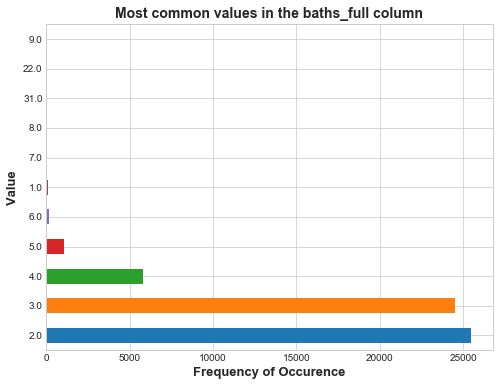


**************************************************

BATHS_HALF

Data type: float64
Count: 57277
Number of Unique Values: 6
Number of nulls: 0 - 0.0%

Mean: 0.6483754386577509
Minimum: 0.0
Lower Quartile: 0.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 5.0


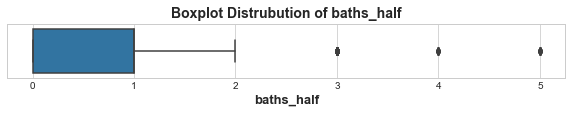

None



0.0    21640
1.0    34290
2.0     1228
3.0       97
4.0       10
5.0       12
Name: baths_half, dtype: int64

None



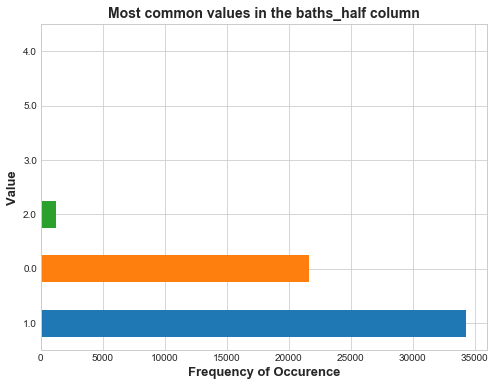


**************************************************

STORIES

Data type: float64
Count: 57277
Number of Unique Values: 7
Number of nulls: 0 - 0.0%

Mean: 1.7596504705204532
Minimum: 1.0
Lower Quartile: 1.0
Median: 2.0
Upper Quartile: 2.0
Maximum: 4.0


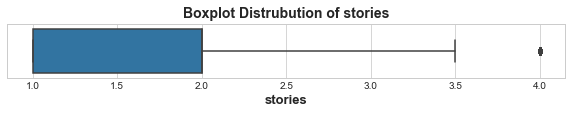

None



1.0    20865
1.5     1657
2.0    28141
       ...  
3.0     5181
3.5       18
4.0     1341
Name: stories, Length: 7, dtype: int64

None



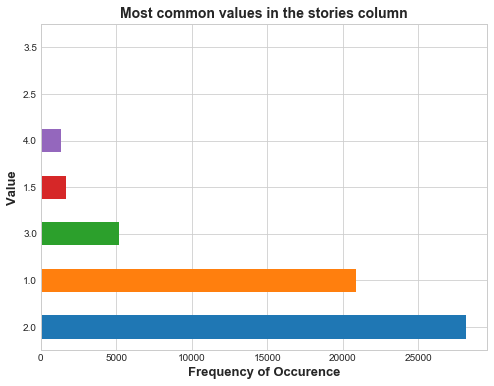


**************************************************

NEW_CONSTRUCTION

Data type: int64
Count: 57277
Number of Unique Values: 1
Number of nulls: 0 - 0.0%

Mean: 1.0
Minimum: 1
Lower Quartile: 1.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 1


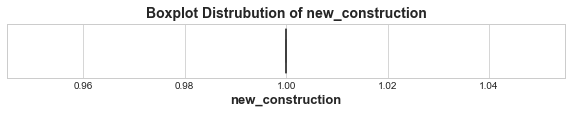

None



1    57277
Name: new_construction, dtype: int64

None



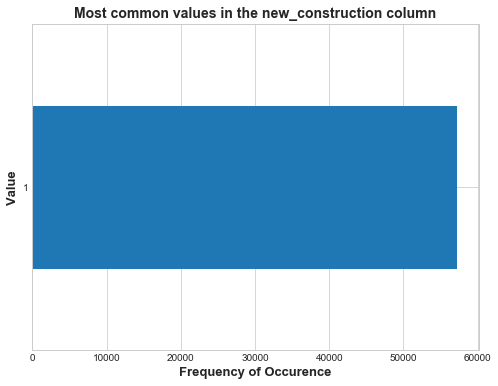


**************************************************

NEW_CONSTRUCTION_DESC

Data type: object
Number of unique values: 2
Number of nulls: 0 - 0.0%
count                              57277
unique                                 2
top       To Be Built/Under Construction
freq                               34935
Name: new_construction_desc, dtype: object



Never Lived In                    22342
To Be Built/Under Construction    34935
Name: new_construction_desc, dtype: int64

None



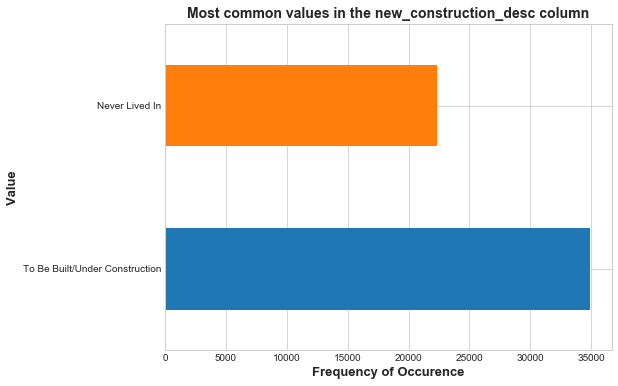


**************************************************

POOL_PRIVATE

Data type: int64
Count: 57277
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.005132950398938492
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 0.0
Maximum: 1


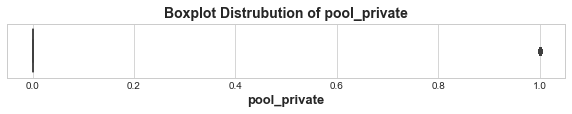

None



0    56983
1      294
Name: pool_private, dtype: int64

None



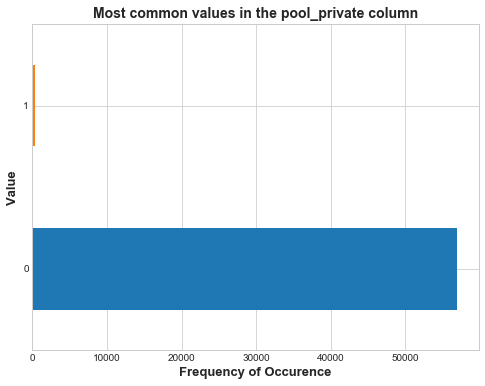


**************************************************

CDOM

Data type: int64
Count: 57277
Number of Unique Values: 1102
Number of nulls: 0 - 0.0%

Mean: 145.33074357944724
Minimum: 0
Lower Quartile: 37.0
Median: 100.0
Upper Quartile: 194.0
Maximum: 1597


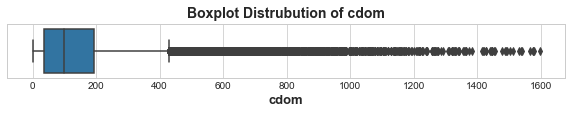

None



0      2899
1       701
10      251
       ... 
99      199
995       1
997       1
Name: cdom, Length: 1102, dtype: int64

None



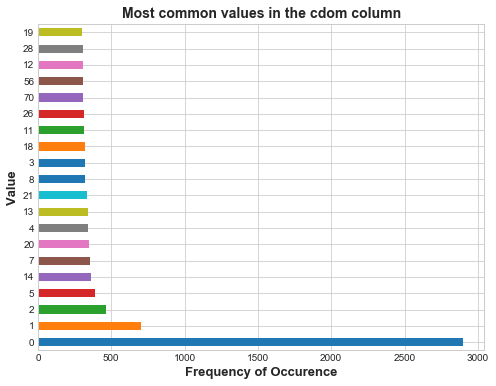


**************************************************

LAST_CHANGE_TIMESTAMP

Data type: datetime64[ns]
Number of unique values: 55948
Number of nulls: 0 - 0.0%
count                   57277
unique                  55948
top       2017-07-01 00:30:03
freq                       18
first     2015-12-28 10:02:41
last      2019-06-19 22:36:49
Name: last_change_timestamp, dtype: object



2015-12-28 10:02:41    1
2016-05-19 00:30:02    1
2017-01-02 00:30:01    3
                      ..
2019-06-19 21:08:00    1
2019-06-19 21:47:25    1
2019-06-19 22:36:49    1
Name: last_change_timestamp, Length: 55948, dtype: int64

None



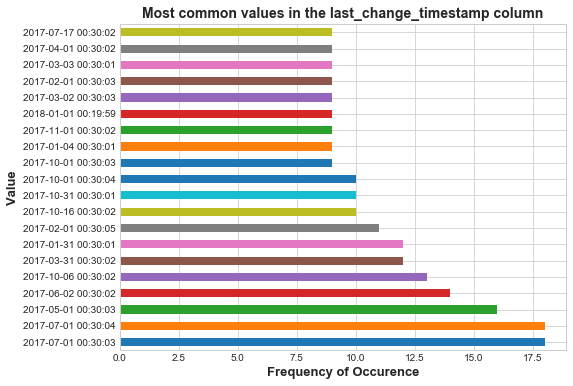


**************************************************

LIST_DATE

Data type: datetime64[ns]
Number of unique values: 1397
Number of nulls: 0 - 0.0%
count                   57277
unique                   1397
top       2018-02-27 00:00:00
freq                      167
first     2008-08-11 00:00:00
last      2019-06-19 00:00:00
Name: list_date, dtype: object



2008-08-11      1
2009-05-24      1
2013-08-31      1
             ... 
2019-06-17     66
2019-06-18     81
2019-06-19    108
Name: list_date, Length: 1397, dtype: int64

None



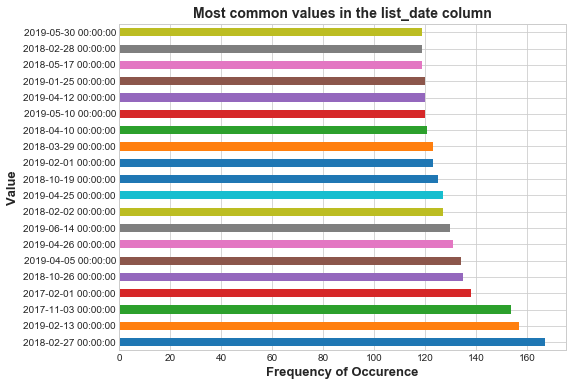


**************************************************

FIREPLACE

Data type: int64
Count: 57277
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.41700857237634653
Minimum: 0
Lower Quartile: 0.0
Median: 0.0
Upper Quartile: 1.0
Maximum: 1


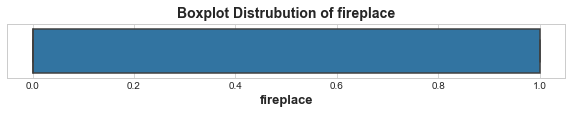

None



0    33392
1    23885
Name: fireplace, dtype: int64

None



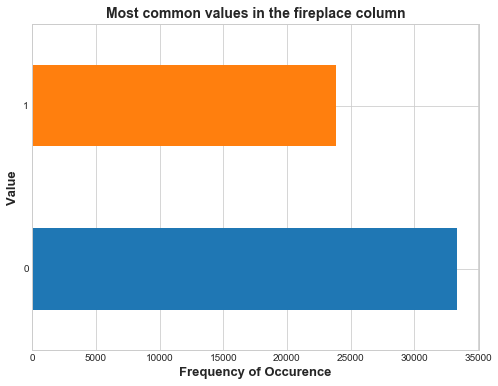


**************************************************

GARAGE

Data type: int64
Count: 57277
Number of Unique Values: 2
Number of nulls: 0 - 0.0%

Mean: 0.9858232798505508
Minimum: 0
Lower Quartile: 1.0
Median: 1.0
Upper Quartile: 1.0
Maximum: 1


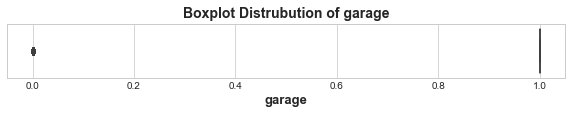

None



0      812
1    56465
Name: garage, dtype: int64

None



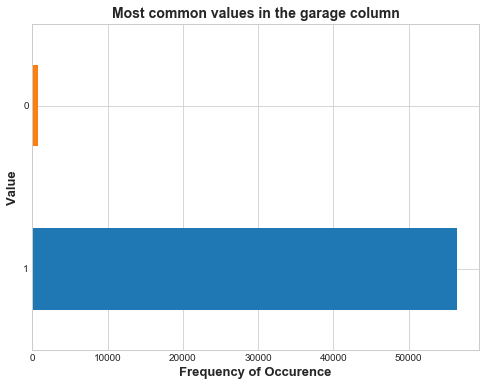


**************************************************

LIST_PPSQFT

Data type: float64
Count: 57277
Number of Unique Values: 45295
Number of nulls: 0 - 0.0%

Mean: 145.7389059614652
Minimum: 12.695099818511796
Lower Quartile: 112.54699594544785
Median: 128.1610123855681
Upper Quartile: 157.0603125
Maximum: 1930.0469483568074


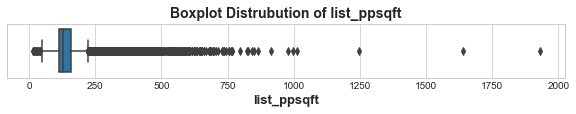

None



100.0                 4
100.00103199174407    1
100.00416782439567    1
                     ..
99.99736842105263     1
99.99782608695652     1
997.2229235041656     1
Name: list_ppsqft, Length: 45295, dtype: int64

None



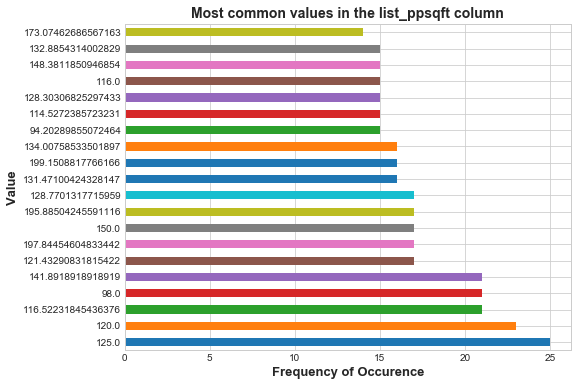


**************************************************

CLOSE_PPSQFT

Data type: float64
Count: 57277
Number of Unique Values: 29671
Number of nulls: 0 - 0.0%

Mean: 75.25438745404533
Minimum: 0.0
Lower Quartile: 0.0
Median: 99.29787234042553
Upper Quartile: 123.07187397440104
Maximum: 997.2229235041656


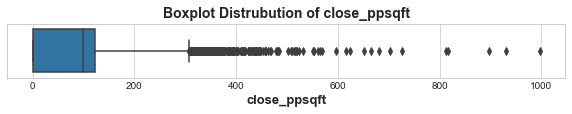

None



0.0                   24258
100.0                    12
100.00329428989751        1
                      ...  
99.99580536912751         1
99.99619771863118         1
997.2229235041656         1
Name: close_ppsqft, Length: 29671, dtype: int64

None



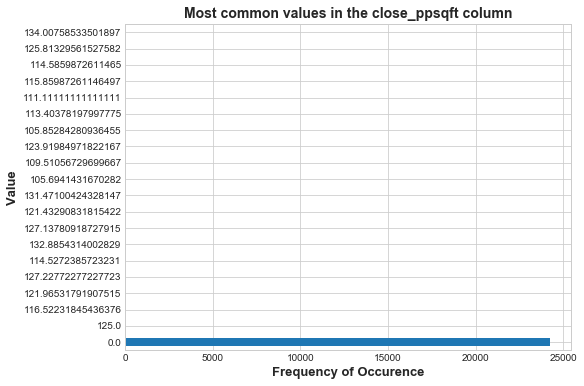


**************************************************



In [31]:
preview_cols(new_cons)

Of the newly constructed houses and the ones still being built, the following observations can be made:

* Mostly single-family homes
* Mostly 4 bedrooms, followed by 3 then 5 bedrooms
* Mostly 2 full baths, closely followed by 3 full baths
* Mostly 1 half bath
* Mostly 2 stories
* Most have no pool
* Fireplaces are prevalent but less common
* Large majority have garage

## Time of Year

Does the time of year impact the selling value? To accurately analyze this, we must limit the homes to those listed before 2019, as we don't have conclusive data from the year 2019 yet.

In [32]:
pre2019 = df[df.list_date.dt.year<2019]

In [33]:
soldpre2019 = pre2019[pre2019.status=='Sold']

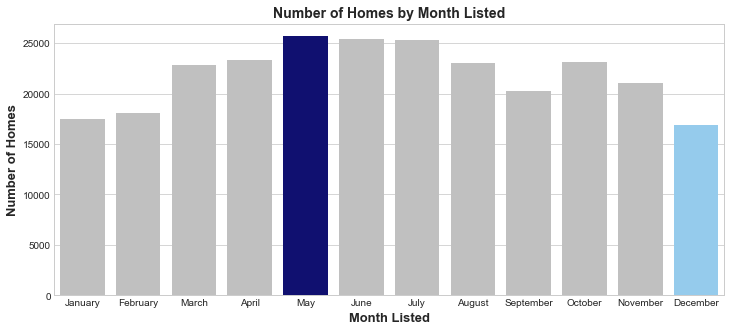

In [34]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(pre2019.list_date.dt.month == i))
    
clrs = ['lightskyblue' if (x == min(monthly_sales)) else 'navy' if (x == max(monthly_sales)) else 'silver' for x in monthly_sales]   
    
plt.figure(figsize=(12,5))
sns.barplot(months, monthly_sales, palette=clrs)

plt.title('Number of Homes by Month Listed', fontsize=14, fontweight='bold')
plt.ylabel("Number of Homes", fontsize=13, fontweight='bold')
plt.xlabel("Month Listed", fontsize=13, fontweight='bold')
plt.show()

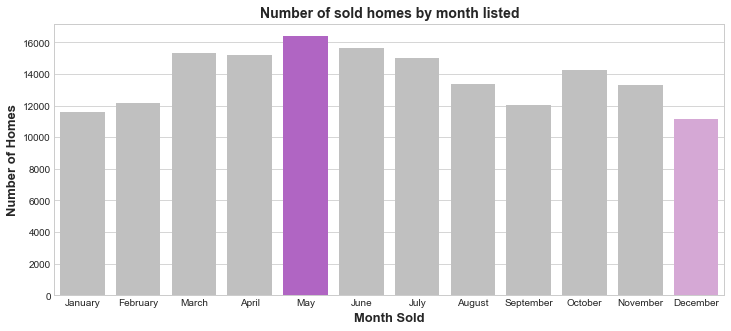

In [35]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(soldpre2019.list_date.dt.month == i))
    
clrs = ['plum' if (x == min(monthly_sales)) else 'mediumorchid' if (x == max(monthly_sales)) else 'silver' for x in monthly_sales]   
    
plt.figure(figsize=(12,5))
sns.barplot(months, monthly_sales, palette=clrs)

plt.title('Number of sold homes by month listed', fontsize=14, fontweight='bold')
plt.ylabel("Number of Homes", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()

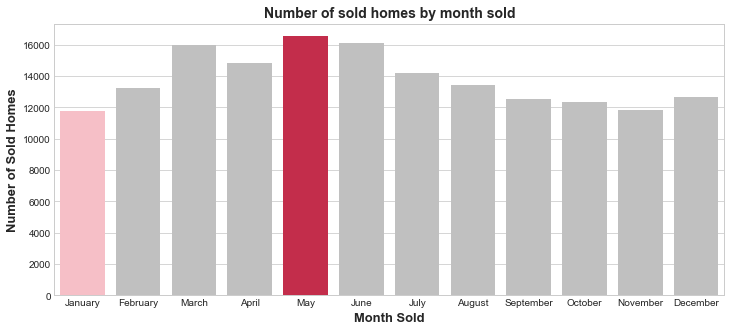

In [37]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(soldpre2019.close_date.dt.month == i))

clrs = ['lightpink' if (x == min(monthly_sales)) else 'crimson' if (x == max(monthly_sales)) else 'silver' for x in monthly_sales]

plt.figure(figsize=(12,5))
sns.barplot(months, monthly_sales, palette=clrs)
plt.title('Number of sold homes by month sold', fontsize=14, fontweight='bold')
plt.ylabel("Number of Sold Homes", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()

Of the homes sold, the majority were listed and closed in May. The least frequent listing month of homes that sold was in December, and the least frequent closing month of homes that sold was in January.

In [38]:
just_time = soldpre2019[['close_date','close_price',]]
averages = just_time.groupby(soldpre2019.close_date.dt.month).mean().sort_values('close_price',ascending=True)
averages.sort_index(axis=0,ascending=True,inplace=True)
averages

,close_price
close_date,
1,263357.291833
2,271763.063191
3,281149.492660
4,289863.818077
5,291836.008952
6,295330.984625
7,286906.155452
8,282752.893617
9,279116.176541


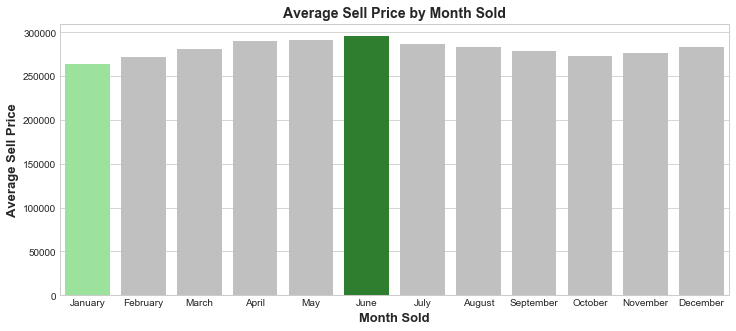

In [39]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avgs = []

for i in range(1,13):
    monthly_avgs.append(averages.close_price[i])
    
clrs = ['lightgreen' if (x == min(monthly_avgs)) else 'forestgreen' if (x == max(monthly_avgs)) else 'silver' for x in monthly_avgs]   
    
plt.figure(figsize=(12,5))
sns.barplot(months, monthly_avgs, palette=clrs)
plt.title('Average Sell Price by Month Sold', fontsize=14, fontweight='bold')
plt.ylabel("Average Sell Price", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()

Homes sold in June sold for a higher price on average than any other month, while homes sold in January sold for a lower price on average than any other month. 

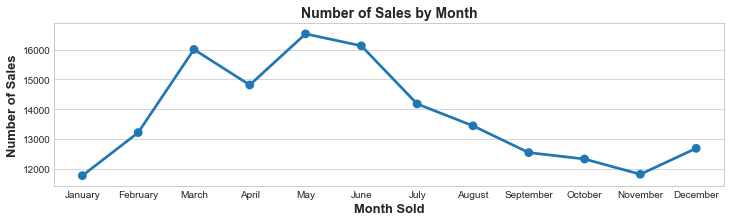

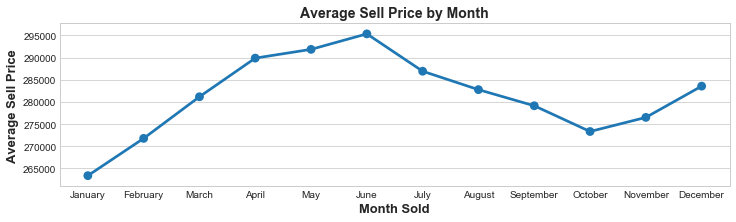

In [40]:
plt.figure(figsize=(12,3))
sns.pointplot(months, monthly_sales)
plt.title('Number of Sales by Month', fontsize=14, fontweight='bold')
plt.ylabel("Number of Sales", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()
    
plt.figure(figsize=(12,3))
sns.pointplot(months, monthly_avgs)
plt.title('Average Sell Price by Month', fontsize=14, fontweight='bold')
plt.ylabel("Average Sell Price", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()

### Close Price Per Sq Ft

In [41]:
just_time_ppsqft = soldpre2019[['close_date','close_ppsqft']]
averages_ppsqft = just_time_ppsqft.groupby(soldpre2019.close_date.dt.month).mean().sort_values('close_ppsqft',ascending=True)
averages_ppsqft.sort_index(axis=0,ascending=True,inplace=True)
averages_ppsqft

,close_ppsqft
close_date,
1,110.452845
2,113.280820
3,115.735299
4,117.310681
5,117.887086
6,118.470919
7,116.089983
8,115.901453
9,115.493514


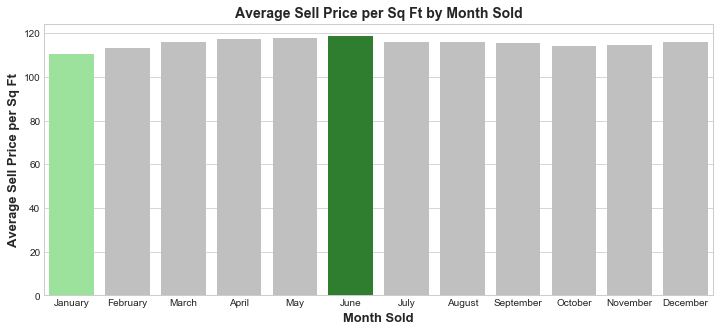

In [42]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avgs_ppsqft = []

for i in range(1,13):
    monthly_avgs_ppsqft.append(averages_ppsqft.close_ppsqft[i])
    
clrs = ['lightgreen' if (x == min(monthly_avgs)) else 'forestgreen' if (x == max(monthly_avgs)) else 'silver' for x in monthly_avgs]
    
plt.figure(figsize=(12,5))
sns.barplot(months, monthly_avgs_ppsqft, palette=clrs)
plt.title('Average Sell Price per Sq Ft by Month Sold', fontsize=14, fontweight='bold')
plt.ylabel("Average Sell Price per Sq Ft", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()

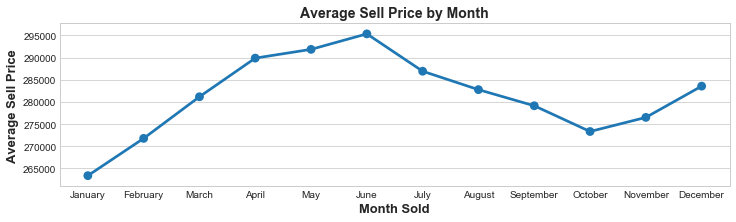

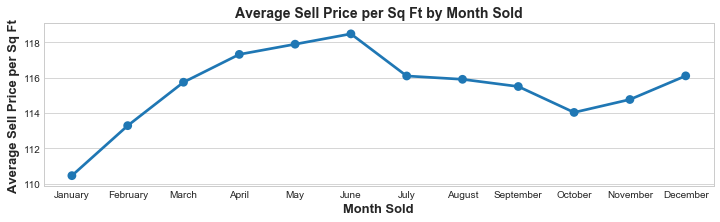

In [43]:
plt.figure(figsize=(12,3))
sns.pointplot(months, monthly_avgs)
plt.title('Average Sell Price by Month', fontsize=14, fontweight='bold')
plt.ylabel("Average Sell Price", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()
    
plt.figure(figsize=(12,3))
sns.pointplot(months, monthly_avgs_ppsqft)
plt.title("Average Sell Price per Sq Ft by Month Sold", fontsize=14, fontweight='bold')
plt.ylabel("Average Sell Price per Sq Ft", fontsize=13, fontweight='bold')
plt.xlabel("Month Sold", fontsize=13, fontweight='bold')
plt.show()

## Price Per Sq Ft

In [44]:
ppsqft = pd.DataFrame()
ppsqft['dscr'] = ['list_ppsqft_avg','sold_list_ppsqft_avg','close_ppsqft_avg']
ppsqft['avg'] = [df.list_ppsqft.mean(), sold.list_ppsqft.mean(), sold.close_ppsqft.mean()]

In [45]:
ppsqft

,dscr,avg
0,list_ppsqft_avg,127.897674
1,sold_list_ppsqft_avg,119.584197
2,close_ppsqft_avg,116.203731


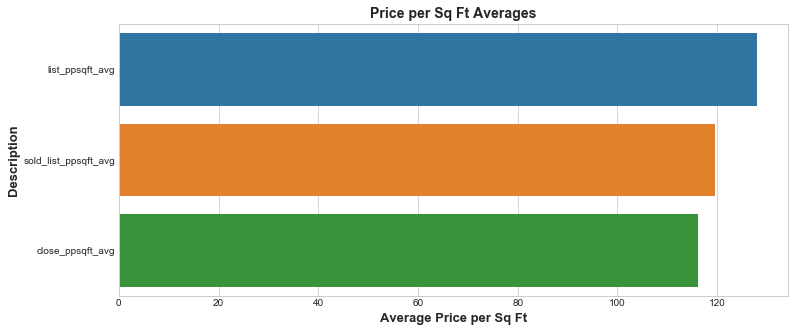

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(x='avg',y='dscr',data=ppsqft)
plt.title("Price per Sq Ft Averages", fontsize=14, fontweight='bold')
plt.ylabel("Description", fontsize=13, fontweight='bold')
plt.xlabel("Average Price per Sq Ft", fontsize=13, fontweight='bold')
plt.show()

## Over the Years

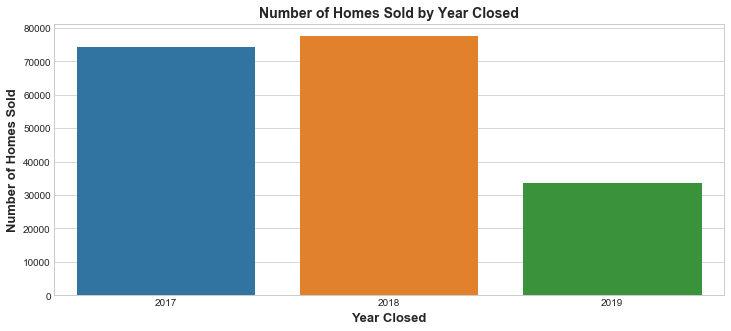

In [47]:
years = sold.close_date.dt.year.unique()
annual_sales = []

for i in years:
    annual_sales.append(sum(sold.close_date.dt.year == i))
    
plt.figure(figsize=(12,5))
sns.barplot(years, annual_sales)
plt.title('Number of Homes Sold by Year Closed', fontsize=14, fontweight='bold')
plt.ylabel("Number of Homes Sold", fontsize=13, fontweight='bold')
plt.xlabel("Year Closed", fontsize=13, fontweight='bold')
plt.show()

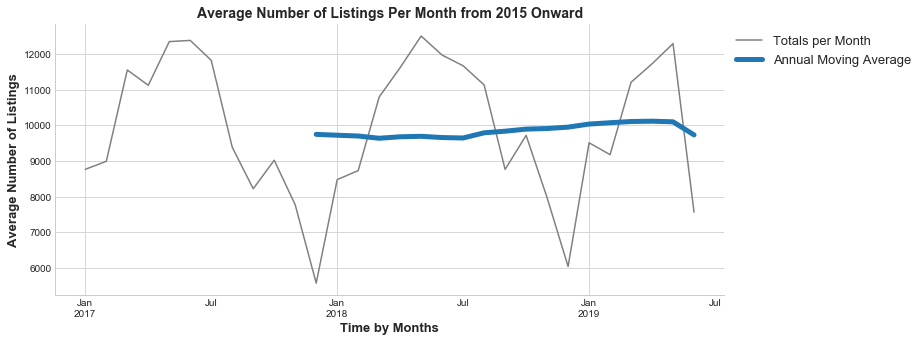

In [48]:
fig, ax = plt.subplots(figsize=(12,5))

df[df.list_date.dt.year>=2017].set_index('list_date').resample('M').size().plot(label='Totals per Month', color='grey', ax=ax)

df[df.list_date.dt.year>=2017].set_index('list_date').resample('M').size().rolling(window=12).mean()\
                    .plot(linewidth=5, label='Annual Moving Average', ax=ax)
ax.set_title('Average Number of Listings Per Month from 2015 Onward', fontsize=14, fontweight='bold')
ax.set_xlabel('Time by Months', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Number of Listings', fontsize=13, fontweight='bold')
ax.legend(frameon=False, bbox_to_anchor=(1, 1), fontsize=13)

sns.despine(ax=ax, top=True, bottom=False, left=False, right=True)
plt.show()

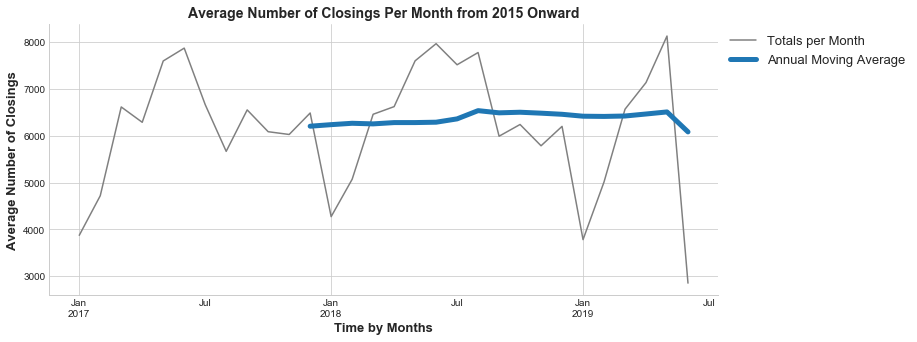

In [49]:
fig, ax = plt.subplots(figsize=(12,5))

sold.set_index('close_date').resample('M').size().plot(label='Totals per Month', color='grey', ax=ax)

sold.set_index('close_date').resample('M').size().rolling(window=12).mean()\
                    .plot(linewidth=5, label='Annual Moving Average', ax=ax)
ax.set_title('Average Number of Closings Per Month from 2015 Onward', fontsize=14, fontweight='bold')
ax.set_xlabel('Time by Months', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Number of Closings', fontsize=13, fontweight='bold')
ax.legend(frameon=False, bbox_to_anchor=(1, 1), fontsize=13)

sns.despine(ax=ax, top=True, bottom=False, left=False, right=True)
plt.show()

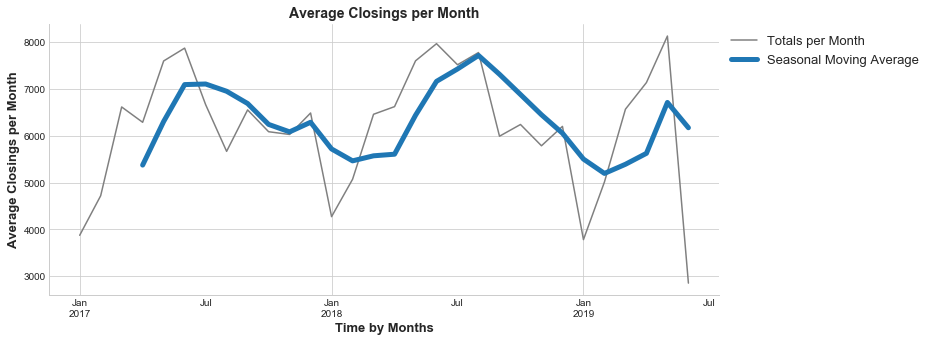

In [50]:
fig, ax = plt.subplots(figsize=(12,5))

sold.set_index('close_date').resample('M').size().plot(label='Totals per Month', color='grey', ax=ax)

sold.set_index('close_date').resample('M').size().rolling(window=4).mean()\
                    .plot(linewidth=5, label='Seasonal Moving Average', ax=ax)
ax.set_title('Average Closings per Month', fontsize=14, fontweight='bold')
ax.set_xlabel('Time by Months', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Closings per Month', fontsize=13, fontweight='bold')
ax.legend(frameon=False, bbox_to_anchor=(1, 1), fontsize=13)

sns.despine(ax=ax, top=True, bottom=False, left=False, right=True)
plt.show()

## Decades

In [51]:
decades = df.copy(deep=True)

In [52]:
decades['decade_built'] = decades.year_built

In [53]:
decades.loc[decades.decade_built.astype('str').str.contains('195'), 'decade_built'] = "1950s"
decades.loc[decades.decade_built.astype('str').str.contains('196'), 'decade_built'] = "1960s"
decades.loc[decades.decade_built.astype('str').str.contains('197'), 'decade_built'] = "1970s"
decades.loc[decades.decade_built.astype('str').str.contains('198'), 'decade_built'] = "1980s"
decades.loc[decades.decade_built.astype('str').str.contains('199'), 'decade_built'] = "1990s"
decades.loc[decades.decade_built.astype('str').str.contains('200'), 'decade_built'] = "2000s"
decades.loc[decades.decade_built.astype('str').str.contains('201'), 'decade_built'] = "2010s"

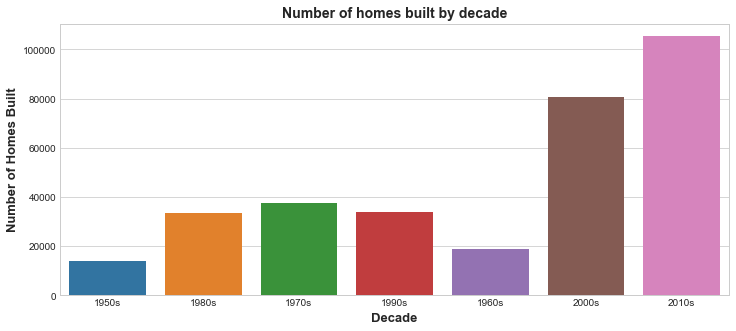

In [54]:
decade = decades.decade_built.unique()
built_per_decade = []

for i in decade:
    built_per_decade.append(sum(decades.decade_built == i))
    
plt.figure(figsize=(12,5))
sns.barplot(decade, built_per_decade)
plt.title('Number of homes built by decade', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=13, fontweight='bold')
plt.ylabel('Number of Homes Built', fontsize=13, fontweight='bold')
plt.show()

In [55]:
decades_sold = sold.copy(deep=True)

In [56]:
decades_sold['decade_built'] = decades_sold.year_built

In [57]:
decades_sold.loc[decades_sold.decade_built.astype('str').str.contains('195'), 'decade_built'] = "1950s"
decades_sold.loc[decades_sold.decade_built.astype('str').str.contains('196'), 'decade_built'] = "1960s"
decades_sold.loc[decades_sold.decade_built.astype('str').str.contains('197'), 'decade_built'] = "1970s"
decades_sold.loc[decades_sold.decade_built.astype('str').str.contains('198'), 'decade_built'] = "1980s"
decades_sold.loc[decades_sold.decade_built.astype('str').str.contains('199'), 'decade_built'] = "1990s"
decades_sold.loc[decades_sold.decade_built.astype('str').str.contains('200'), 'decade_built'] = "2000s"
decades_sold.loc[decades_sold.decade_built.astype('str').str.contains('201'), 'decade_built'] = "2010s"

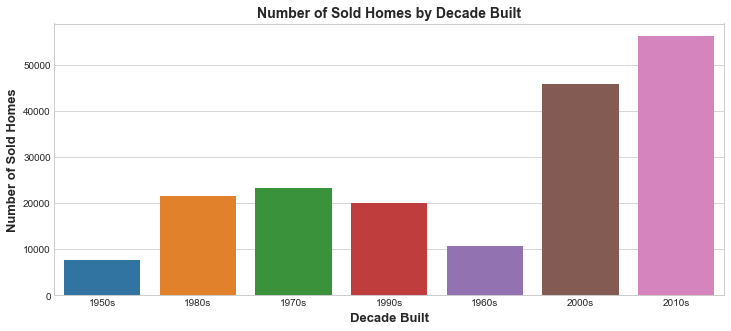

In [58]:
decade = decades_sold.decade_built.unique()
sold_per_decade_built = []

for i in decade:
    sold_per_decade_built.append(sum(decades_sold.decade_built == i))
    
plt.figure(figsize=(12,5))
sns.barplot(decade, sold_per_decade_built)
plt.title('Number of Sold Homes by Decade Built', fontsize=14, fontweight='bold')
plt.xlabel('Decade Built', fontsize=13, fontweight='bold')
plt.ylabel('Number of Sold Homes', fontsize=13, fontweight='bold')
plt.show()

In [59]:
decade_avgs = decades.groupby(decades.decade_built).mean()[['list_price','close_price','area','sq_ft_total','lot_size','bedrooms','baths_full','baths_half','stories','list_ppsqft','close_ppsqft']]
decade_avgs

,list_price,close_price,area,sq_ft_total,lot_size,bedrooms,baths_full,baths_half,stories,list_ppsqft,close_ppsqft
decade_built,,,,,,,,,,,
1950s,300342.206916,136069.669147,13.813279,1731.306689,11876.323073,3.115859,1.739796,0.181689,1.051516,162.670745,77.130697
1960s,299173.230623,141401.700704,18.552193,1991.828051,23470.977260,3.288133,1.962065,0.328660,1.184937,141.302898,71.042719
1970s,216832.719044,116780.001657,19.582656,2020.245643,25710.541093,3.273631,2.051780,0.436404,1.394982,106.368896,60.745804
1980s,237637.224459,130784.511574,20.581828,2083.656568,24900.752686,3.193265,2.107698,0.490639,1.496994,112.287856,67.210109
1990s,362530.680525,178921.434632,21.587138,2782.997770,20394.294643,3.703116,2.460275,0.673424,1.673146,124.570660,67.315673
2000s,356808.613072,166743.872165,21.445269,2786.737744,15317.240723,3.686325,2.515159,0.662284,1.715470,121.899205,63.837675
2010s,402745.779035,184540.022619,22.845989,2780.077181,19508.412791,3.734472,2.725337,0.659960,1.745511,139.103865,67.935442


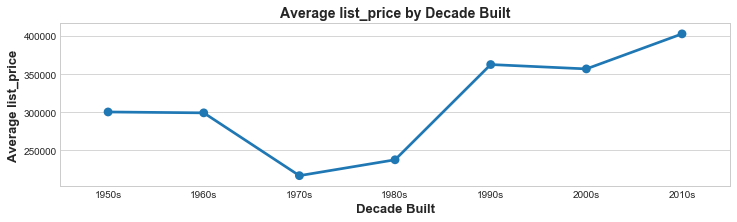

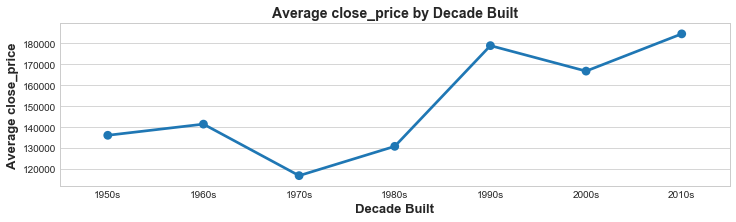

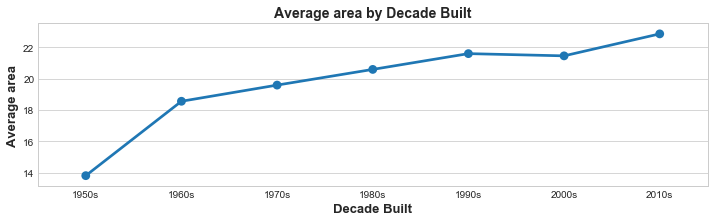

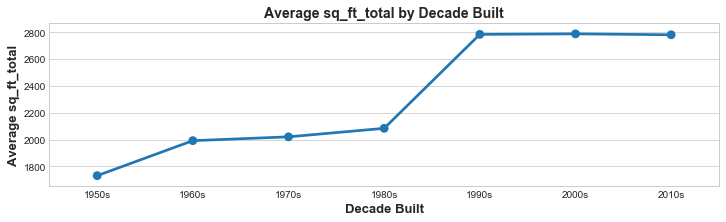

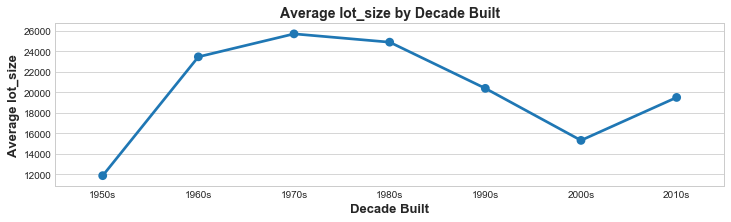

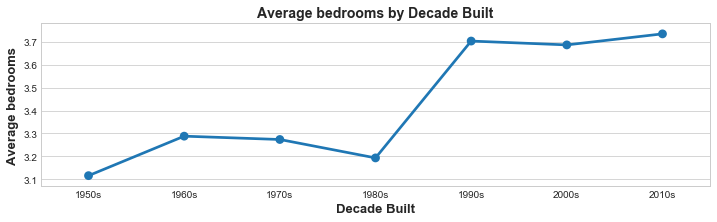

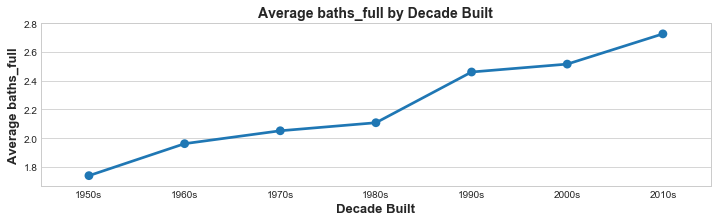

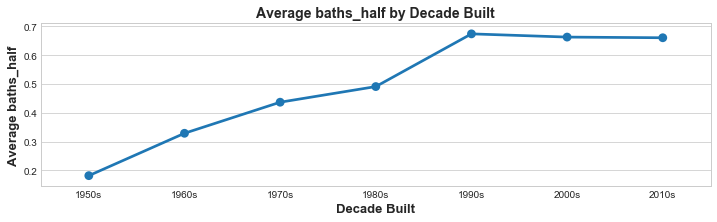

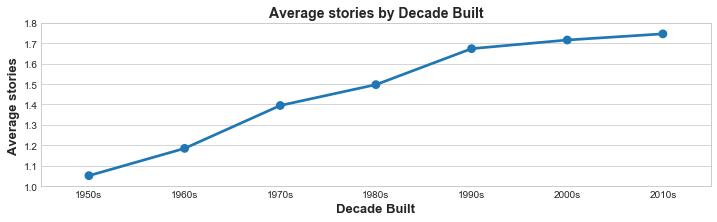

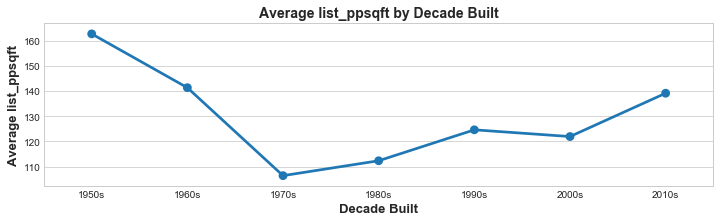

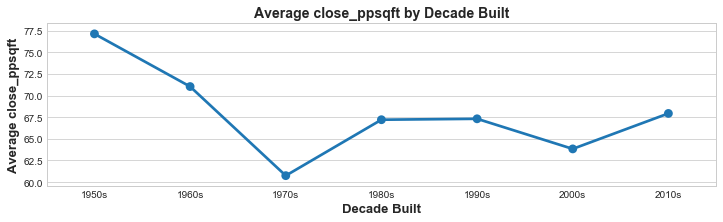

In [60]:
for i in decade_avgs.columns:
    plt.figure(figsize=(12,3))
    sns.pointplot(decade_avgs.index, decade_avgs[i])
    plt.title(f"Average {i} by Decade Built", fontsize=14, fontweight='bold')
    plt.ylabel(f"Average {i}", fontsize=13, fontweight='bold')
    plt.xlabel("Decade Built", fontsize=13, fontweight='bold')
    plt.show()

**Observations:**

* The average number of bedrooms, bathrooms, stories, and average sq ft increased over the decades
* Half baths became much more popular in the 1990s
* Average lot size decreased , specifically after the 1980s
* Most of the homes listed and sold during this time period were built in the 2000s and 2010s
* There is a dip in the value of houses built in the 1970s, both in list price and close price

## School Districts

### Katy ISD

Katy is currently #1 rated school district in the Houston area (out of 46 school districts), and #14 in Texas (out of 1,024 statewide school districts). Let's look at the sales trends in this school district.

In [61]:
view(df[df.school_district=='30 - Katy'],2)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,cdom,last_change_timestamp,list_date,fireplace,garage,list_ppsqft,close_ppsqft
203,47479289,Single-Family,Sold,6323,Canyon Rock,Katy,77450,Fort Bend,125000,125000,2017-09-22,36,30 - Katy,CREECH ELEMENTARY SCHOOL,BECK JUNIOR HIGH SCHOOL,CINCO RANCH HIGH SCHOOL,1614.0,6456.0,2000,3.0,2.0,0.0,1.0,0,Not New,0,3,2017-09-22 10:54:17,2017-09-11,1,1,77.447336,77.447336
341,69107427,Single-Family,Sold,6311,Clear Canyon,Katy,77450,Fort Bend,155000,150000,2017-09-29,36,30 - Katy,CREECH ELEMENTARY SCHOOL,BECK JUNIOR HIGH SCHOOL,CINCO RANCH HIGH SCHOOL,2058.0,6791.0,1998,3.0,2.0,0.0,1.0,0,Not New,0,2,2017-09-29 12:30:50,2017-09-22,0,1,75.315841,72.886297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371392,20024438,Single-Family,Withdrawn,1911,Parklake,Katy,77450,Harris,1690000,0,1900-01-01,36,30 - Katy,PATTISON ELEMENTARY SCHOOL,MCMEANS JUNIOR HIGH SCHOOL,TAYLOR HIGH SCHOOL (KATY),7604.0,15810.0,2016,6.0,6.0,2.0,2.0,0,Not New,1,105,2019-06-12 10:36:09,2019-02-27,1,1,222.251447,0.000000
371396,6905736,Single-Family,Withdrawn,2406,Ivy Run,Katy,77450,Harris,1750000,0,1900-01-01,36,30 - Katy,HAYES ELEMENTARY SCHOOL,MCMEANS JUNIOR HIGH SCHOOL,TAYLOR HIGH SCHOOL (KATY),7264.0,33628.0,2008,5.0,5.0,2.0,2.0,0,Not New,1,34,2019-05-28 16:58:44,2019-04-24,1,1,240.914097,0.000000


In [62]:
katy = df[df.school_district=='30 - Katy']

In [63]:
view(sold[sold.school_district=='30 - Katy'],2)

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,cdom,last_change_timestamp,list_date,fireplace,garage,list_ppsqft,close_ppsqft
203,47479289,Single-Family,Sold,6323,Canyon Rock,Katy,77450,Fort Bend,125000,125000,2017-09-22,36,30 - Katy,CREECH ELEMENTARY SCHOOL,BECK JUNIOR HIGH SCHOOL,CINCO RANCH HIGH SCHOOL,1614.0,6456.0,2000,3.0,2.0,0.0,1.0,0,Not New,0,3,2017-09-22 10:54:17,2017-09-11,1,1,77.447336,77.447336
341,69107427,Single-Family,Sold,6311,Clear Canyon,Katy,77450,Fort Bend,155000,150000,2017-09-29,36,30 - Katy,CREECH ELEMENTARY SCHOOL,BECK JUNIOR HIGH SCHOOL,CINCO RANCH HIGH SCHOOL,2058.0,6791.0,1998,3.0,2.0,0.0,1.0,0,Not New,0,2,2017-09-29 12:30:50,2017-09-22,0,1,75.315841,72.886297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305493,10251910,Single-Family,Sold,27710,Guthrie Ridge,Katy,77494,Fort Bend,650000,715000,2019-06-03,36,30 - Katy,WILSON ELEMENTARY SCHOOL (KATY),TAYS JUNIOR HIGH SCHOOL,TOMPKINS HIGH SCHOOL,4423.0,14372.0,2009,5.0,4.0,1.0,2.0,0,Not New,1,7,2019-06-07 16:20:15,2019-04-30,1,1,146.959078,161.654985
305537,28612069,Single-Family,Sold,25006,Falling Water Estates,Katy,77494,Fort Bend,1700000,1690000,2019-06-07,36,30 - Katy,GRIFFIN ELEMENTARY SCHOOL (KATY),BECKENDORFF JUNIOR HIGH SCHOOL,SEVEN LAKES HIGH SCHOOL,7184.0,24037.0,2007,5.0,4.0,2.0,2.0,0,Not New,1,21,2019-06-07 10:37:17,2019-04-15,1,1,236.636971,235.244989


In [64]:
katy_sold = sold[sold.school_district=='30 - Katy']

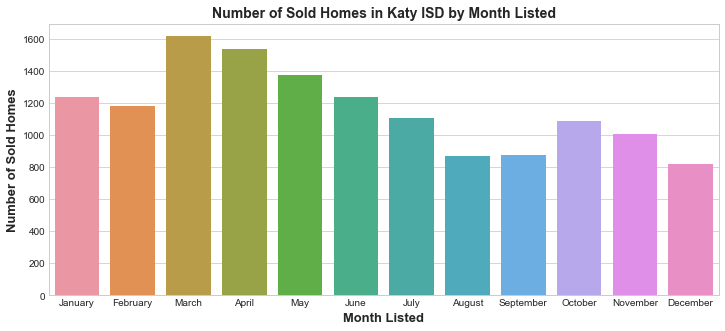

In [65]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(katy_sold.list_date.dt.month == i))
    
plt.figure(figsize=(12,5))
sns.barplot(months, monthly_sales)
plt.title('Number of Sold Homes in Katy ISD by Month Listed', fontsize=14, fontweight='bold')
plt.xlabel('Month Listed', fontsize=13, fontweight='bold')
plt.ylabel('Number of Sold Homes', fontsize=13, fontweight='bold')
plt.show()

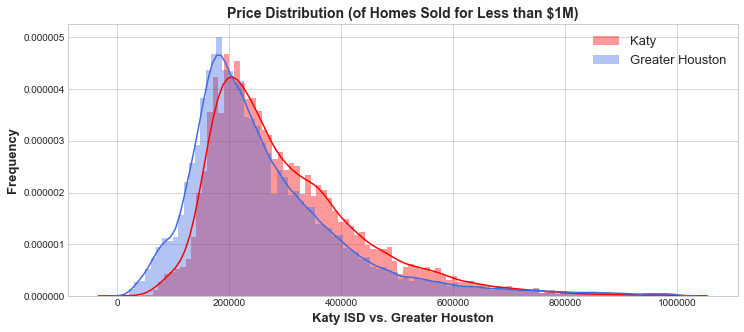

In [66]:
plt.figure(figsize=(12,5))
sns.distplot(katy[katy.status=='Sold'][katy.close_price<1000000].close_price, bins=100, label="Katy", color='red')
sns.distplot(sold[sold.close_price<1000000].close_price, bins=100, label="Greater Houston", color='royalblue')
plt.title("Price Distribution (of Homes Sold for Less than $1M)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.xlabel("Katy ISD vs. Greater Houston", fontsize=13, fontweight='bold')
plt.legend(fontsize=13)
plt.show()

### Houston ISD

In [67]:
hisd = df[df.school_district=='27 - Houston']

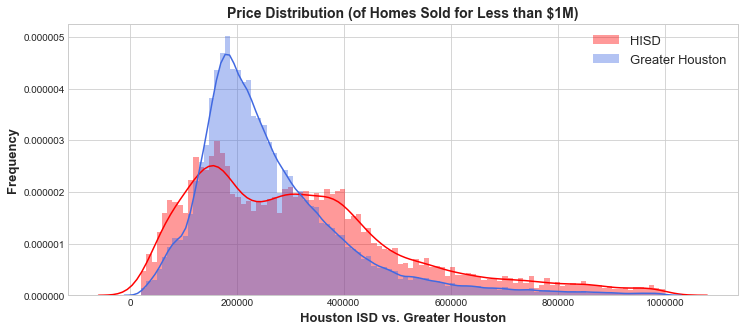

In [68]:
plt.figure(figsize=(12,5))
sns.distplot(hisd[hisd.status=='Sold'][hisd.close_price<1000000].close_price, bins=100, label="HISD", color='red')
sns.distplot(sold[sold.close_price<1000000].close_price, bins=100, label="Greater Houston", color='royalblue')
plt.title("Price Distribution (of Homes Sold for Less than $1M)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.xlabel("Houston ISD vs. Greater Houston", fontsize=13, fontweight='bold')
plt.legend(fontsize=13)
plt.show()

## List Price vs. Close Price

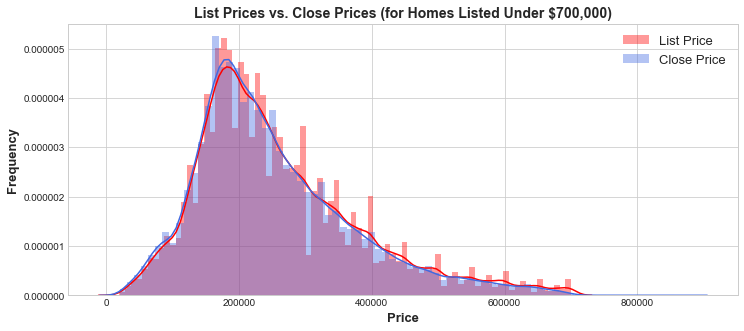

In [69]:
plt.figure(figsize=(12,5))
sns.distplot(sold[sold.list_price<700000].list_price, bins=80, label="List Price", color='red')
sns.distplot(sold[sold.list_price<700000].close_price, bins=80, label="Close Price", color='royalblue')
plt.title("List Prices vs. Close Prices (for Homes Listed Under $700,000)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.xlabel("Price", fontsize=13, fontweight='bold')
plt.legend(fontsize=13)
plt.show()

In [70]:
sold_prices = sold[['mls_number','list_price','close_price']]

In [71]:
sold_prices['diff'] = sold_prices.list_price-sold_prices.close_price
sold_prices['close_fraction'] = sold_prices.close_price/sold_prices.list_price

In [72]:
sold_prices.head()

,mls_number,list_price,close_price,diff,close_fraction
3,47405549,39900,25000,14900,0.626566
4,86143414,25000,25000,0,1.000000
6,99874455,36000,36000,0,1.000000
7,41623334,38000,36100,1900,0.950000
8,59747549,47000,36500,10500,0.776596


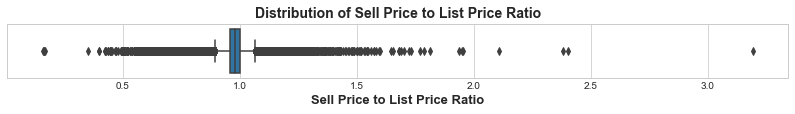

In [73]:
plt.figure(figsize=(14,1))
sns.boxplot(sold_prices.close_fraction)
plt.title('Distribution of Sell Price to List Price Ratio', fontsize=14, fontweight='bold')
plt.xlabel('Sell Price to List Price Ratio', fontsize=13, fontweight='bold')
plt.show()

In [74]:
sold_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
mls_number,185413.0,5.053611e+07,2.825103e+07,104240.000000,2.619446e+07,5.040689e+07,74991949.0,1.089334e+08
list_price,185413.0,2.909781e+05,2.446036e+05,20000.000000,1.750000e+05,2.350000e+05,338165.0,1.875000e+07
close_price,185413.0,2.821176e+05,2.315759e+05,20500.000000,1.720000e+05,2.300000e+05,327000.0,1.750000e+07
diff,185413.0,8.860460e+03,2.269769e+04,-800000.000000,0.000000e+00,4.900000e+03,10999.0,1.719000e+06
close_fraction,185413.0,9.735323e-01,4.921636e-02,0.157593,9.569357e-01,9.807692e-01,1.0,3.192308e+00


In [75]:
sold_prices[sold_prices.close_fraction == sold_prices.close_fraction.max()]

,mls_number,list_price,close_price,diff,close_fraction
191682,26854501,26000,83000,-57000,3.192308


In [76]:
sold_prices.loc[list(sold_prices.close_fraction.sort_values().tail().index)]

,mls_number,list_price,close_price,diff,close_fraction
35463,10413475,90100,175859,-85759,1.951820
70402,75435247,95000,200000,-105000,2.105263
216919,18924348,45400,108150,-62750,2.382159
55206,78274749,20800,50001,-29201,2.403894
191682,26854501,26000,83000,-57000,3.192308


In [77]:
df.loc[list(sold_prices.close_fraction.sort_values().tail().index)]

,mls_number,property_type,status,street_number,street_name,city,zip_code,county,list_price,close_price,close_date,area,school_district,school_elementary,school_middle,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,new_construction_desc,pool_private,cdom,last_change_timestamp,list_date,fireplace,garage,list_ppsqft,close_ppsqft
35463,10413475,Single-Family,Sold,17872,Brown,Conroe,77306,Montgomery,90100,175859,2017-05-24,19,11 - Conroe,MILAM ELEMENTARY SCHOOL (CONROE),MOORHEAD JUNIOR HIGH SCHOOL,CANEY CREEK HIGH SCHOOL,1716.0,221442.0,1991,4.0,1.0,0.0,1.0,0,Not New,0,8,2017-05-25 19:04:57,2017-04-04,0,1,52.505828,102.481935
70402,75435247,Single-Family,Sold,502,10th,Kemah,77565,Galveston,95000,200000,2017-11-28,33,9 - Clear Creek,STEWART ELEMENTARY SCHOOL (CLEAR CREEK),BAYSIDE INTERMEDIATE SCHOOL,CLEAR FALLS HIGH SCHOOL,754.0,4573.0,1956,3.0,1.0,0.0,1.0,0,Not New,0,7,2017-12-11 10:32:43,2017-10-13,0,0,125.994695,265.251989
216919,18924348,Single-Family,Sold,2325,44th,Dickinson,77539,Galveston,45400,108150,2018-12-24,33,17 - Dickinson,CALDER ROAD ELEMENTARY SCHOOL,LOBIT MIDDLE SCHOOL,DICKINSON HIGH SCHOOL,1588.0,11250.0,2003,3.0,2.0,0.0,1.0,0,Not New,0,70,2018-12-24 01:44:47,2018-08-17,0,0,28.589421,68.104534
55206,78274749,Single-Family,Sold,6230,Trescon,Houston,77048,Harris,20800,50001,2017-02-27,3,27 - Houston,FROST ELEMENTARY SCHOOL (HOUSTON),THOMAS MIDDLE SCHOOL,STERLING HIGH SCHOOL (HOUSTON),1124.0,9000.0,1954,3.0,1.0,0.0,1.0,0,Not New,0,16,2017-03-03 10:13:08,2017-01-24,0,0,18.505338,44.484875
191682,26854501,Single-Family,Sold,2627,Whitinham,Houston,77067,Harris,26000,83000,2018-08-31,13,48 - Spring,HERITAGE ELEMENTARY SCHOOL (SPRING),STELLE CLAUGHTON MIDDLE SCHOOL,WESTFIELD HIGH SCHOOL,1666.0,5500.0,2002,3.0,2.0,0.0,1.0,0,Not New,0,16,2018-08-31 16:37:45,2018-06-19,1,1,15.606242,49.819928


I was not expecting such a significant number of homes to be sold for greater than the list price. I assumed that most homes would have a decrease from list price to close price due to negotiations.

# Cleaning for Modeling

In [78]:
df = df_save.copy(deep=True)

In [79]:
df.property_type.value_counts()

Single-Family        298456
Townhouse/Condo       25256
Mid/Hi-Rise Condo       115
Multi-Family             37
Name: property_type, dtype: int64

In [80]:
df['home_age'] = 2019 - df.year_built

In [81]:
df['age_when_listed'] = df.list_date.dt.year - df.year_built

In [82]:
df = df[df.property_type!='Mid/Hi-Rise Condo'][df.property_type!='Multi-Family']

In [83]:
df = df.drop(columns=['street_number','street_name','close_price','close_date','school_elementary','school_middle','new_construction_desc','last_change_timestamp'])

In [84]:
view(df,2)

,mls_number,property_type,status,city,zip_code,county,list_price,area,school_district,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,pool_private,dom,cdom,list_date,fireplace,garage,home_age,age_when_listed
3,47405549,Single-Family,Sold,Winnie,77665,Chambers,39900,53,18 - East Chambers,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,1.0,0,0,0.0,123,2017-08-23,0,0,67,65
4,86143414,Townhouse/Condo,Sold,Galveston,77554,Galveston,25000,33,22 - Galveston,BALL HIGH SCHOOL,801.0,2242.8,1984,1.0,1.0,0.0,2.0,0,0,49.0,49,2017-07-07,1,1,35,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371431,40170341,Single-Family,Withdrawn,Houston,77024,Harris,5250000,23,49 - Spring Branch,MEMORIAL HIGH SCHOOL (SPRING BRANCH),7007.0,75520.0,1957,6.0,5.0,1.0,1.0,0,1,34.0,34,2019-01-25,1,0,62,62
371432,10817804,Single-Family,Withdrawn,Houston,77024,Harris,5999900,23,49 - Spring Branch,MEMORIAL HIGH SCHOOL (SPRING BRANCH),9257.0,27958.0,2019,6.0,6.0,3.0,2.0,1,0,71.0,106,2019-03-25,1,1,0,0


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mls_number,323712.0,5.049123e+07,2.818510e+07,104240.0,26163384.5,50380188.0,74849453.0,338218412.0
zip_code,323712.0,7.730939e+04,1.990718e+02,77002.0,77077.0,77377.0,77471.0,78950.0
list_price,323712.0,3.380560e+05,3.415823e+05,20000.0,189900.0,264900.0,379900.0,29999999.0
area,323712.0,2.111077e+01,1.281624e+01,1.0,10.0,20.0,33.0,86.0
sq_ft_total,323712.0,2.531069e+03,1.149699e+03,450.0,1791.0,2354.0,3063.0,217800.0
lot_size,323712.0,1.972122e+04,1.758325e+06,0.0,6073.0,7800.0,10337.0,999999999.0
year_built,323712.0,1.997075e+03,1.870696e+01,1950.0,1982.0,2003.0,2013.0,2019.0
bedrooms,323712.0,3.557801e+00,8.365728e-01,1.0,3.0,4.0,4.0,30.0
baths_full,323712.0,2.416420e+00,7.940848e-01,1.0,2.0,2.0,3.0,31.0
baths_half,323712.0,5.786409e-01,5.589572e-01,0.0,0.0,1.0,1.0,10.0


In [86]:
view(df.age_when_listed.value_counts().sort_index(),6)

-4         1
-3         6
-2        39
-1      3794
 0     45369
 1      8627
       ...  
 64     1369
 65      906
 66     1024
 67     1387
 68     1210
 69      546
Name: age_when_listed, Length: 74, dtype: int64

In [87]:
df[df.age_when_listed<=-3]

,mls_number,property_type,status,city,zip_code,county,list_price,area,school_district,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,pool_private,dom,cdom,list_date,fireplace,garage,home_age,age_when_listed
102946,7434900,Single-Family,Expired,Houston,77056,Harris,4995000,22,27 - Houston,WISDOM HIGH SCHOOL,9505.0,27237.0,2017,7.0,7.0,1.0,2.0,1,1,1065.0,1065,2014-12-08,1,1,2,-3
124128,57785892,Single-Family,Terminated,Houston,77055,Harris,899000,24,49 - Spring Branch,NORTHBROOK HIGH SCHOOL,3670.0,13690.0,2017,4.0,4.0,1.0,2.0,1,0,1092.0,1136,2014-06-05,1,1,2,-3
130606,58485644,Single-Family,Terminated,Spring,77379,Harris,321990,13,32 - Klein,KLEIN HIGH SCHOOL,3525.0,6900.0,2017,4.0,3.0,1.0,2.0,1,0,1341.0,1341,2014-04-17,1,1,2,-3
251680,14724744,Single-Family,Terminated,Houston,77063,Harris,3650000,22,27 - Houston,WISDOM HIGH SCHOOL,7620.0,46021.0,2017,5.0,5.0,2.0,2.0,1,1,1374.0,1374,2014-05-05,1,1,2,-3
260826,38704773,Single-Family,Terminated,Houston,77027,Harris,2390000,16,27 - Houston,LAMAR HIGH SCHOOL (HOUSTON),5607.0,10800.0,2018,4.0,5.0,1.0,2.0,1,0,974.0,974,2015-08-17,1,1,1,-3
328931,36170680,Single-Family,Terminated,Houston,77005,Harris,2449000,17,27 - Houston,LAMAR HIGH SCHOOL (HOUSTON),5785.0,8821.0,2019,4.0,4.0,2.0,2.0,1,0,1154.0,1154,2016-03-03,1,1,0,-3
336692,49908841,Single-Family,Active,Houston,77004,Harris,1650000,17,27 - Houston,LAMAR HIGH SCHOOL (HOUSTON),4417.0,6250.0,2019,4.0,3.0,0.0,3.0,1,0,1443.0,1443,2015-07-07,0,1,0,-4


In [88]:
df.age_when_listed = df.age_when_listed.replace(-4,0).replace(-3,0).replace(-2,0).replace(-1,0)

In [89]:
view(df.age_when_listed.value_counts().sort_index(),6)

0     49209
1      8627
2      6579
3      8752
4      9269
5      7989
      ...  
64     1369
65      906
66     1024
67     1387
68     1210
69      546
Name: age_when_listed, Length: 70, dtype: int64

In [90]:
num_cols = df.describe().columns

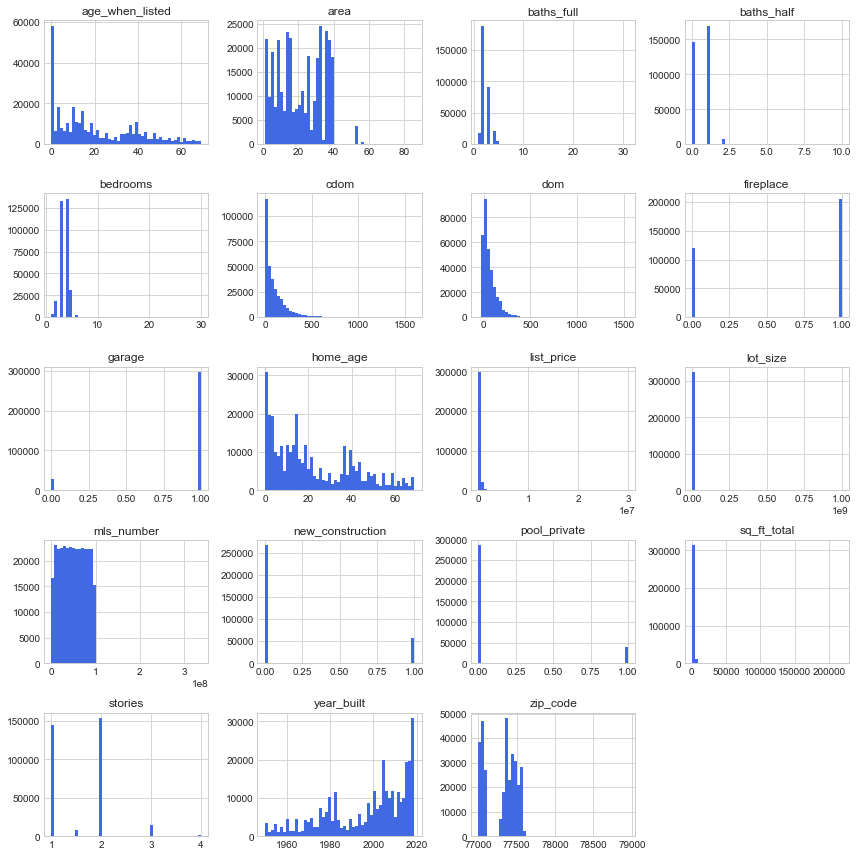

In [91]:
df[df.describe().columns].hist(bins=50, figsize=(12,12), color='royalblue')
plt.tight_layout()
plt.show()

In [92]:
# View skew and kurtosis

for each in list(num_cols):
    print('For '+str(each)+' the skew is '+str(round(skew(df[each]),3))+' and the kurtosis is '+str(round(kurtosis(df[each]),3)))

For mls_number the skew is 0.007 and the kurtosis is -1.161
For zip_code the skew is -0.314 and the kurtosis is -1.282
For list_price the skew is 14.189 and the kurtosis is 636.513
For area the skew is 0.158 and the kurtosis is -0.925
For sq_ft_total the skew is 22.275 and the kurtosis is 3830.648
For lot_size the skew is 568.225 and the kurtosis is 323153.555
For year_built the skew is -0.735 and the kurtosis is -0.562
For bedrooms the skew is 0.223 and the kurtosis is 5.908
For baths_full the skew is 1.596 and the kurtosis is 15.002
For baths_half the skew is 0.455 and the kurtosis is 0.824
For stories the skew is 0.704 and the kurtosis is 0.522
For new_construction the skew is 1.693 and the kurtosis is 0.867
For pool_private the skew is 2.35 and the kurtosis is 3.522
For dom the skew is 2.701 and the kurtosis is 14.829
For cdom the skew is 2.982 and the kurtosis is 14.314
For fireplace the skew is -0.543 and the kurtosis is -1.705
For garage the skew is -2.965 and the kurtosis is 6.

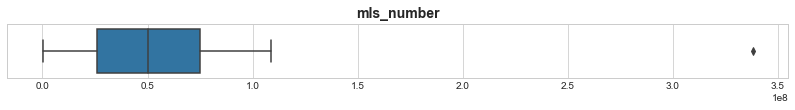

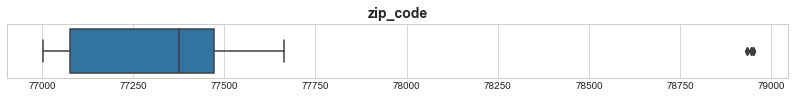

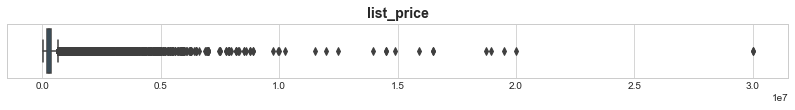

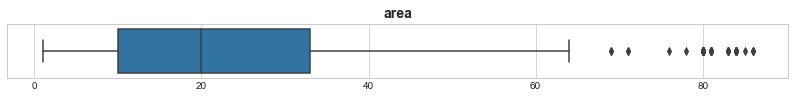

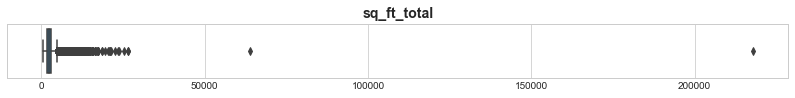

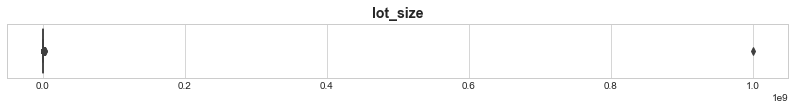

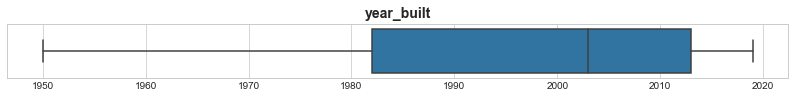

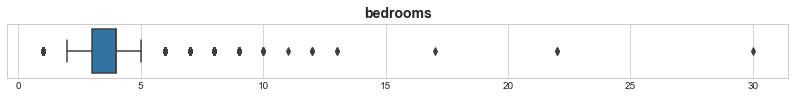

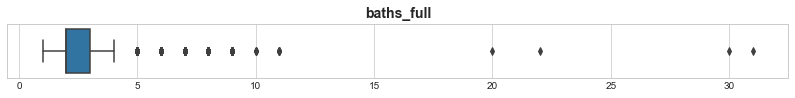

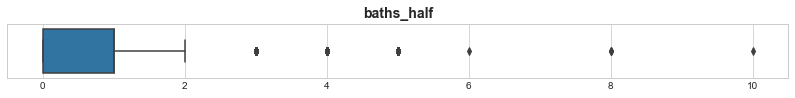

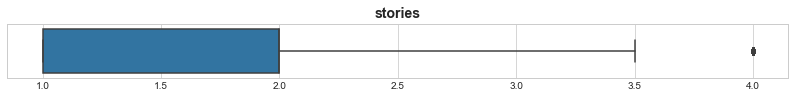

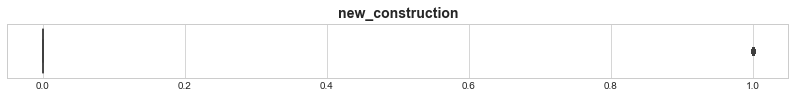

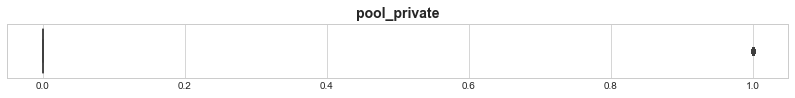

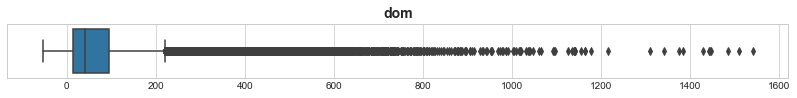

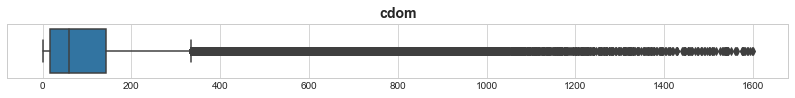

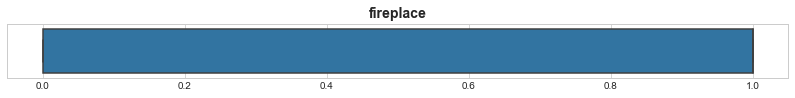

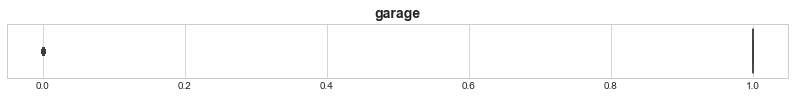

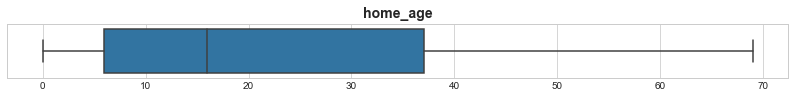

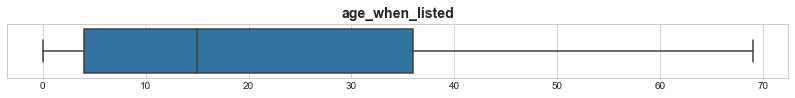

In [93]:
for n in num_cols:
    plt.figure(figsize=(14,1))
    sns.boxplot(df[n])
    plt.title(n, fontsize=14, fontweight='bold')
    plt.xlabel("", fontsize=13, fontweight='bold')
    plt.show()

In [94]:
df = df[~(df.sq_ft_total == df.sq_ft_total.max())] \
    [~(df.lot_size == df.lot_size.max())] \
    [~(df.baths_full == df.baths_full.max())]

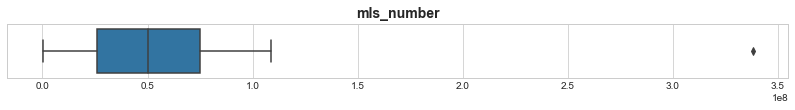

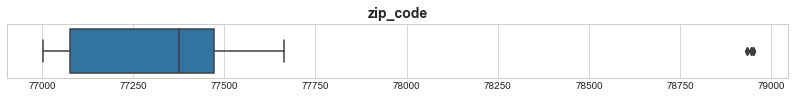

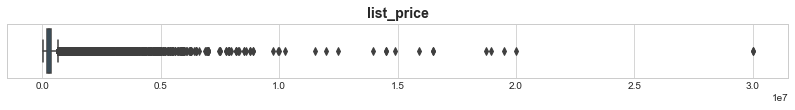

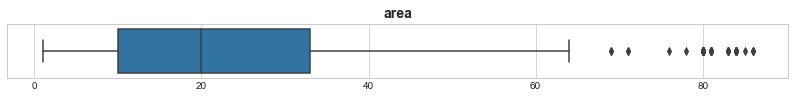

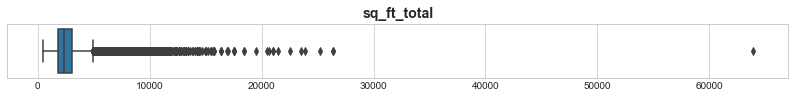

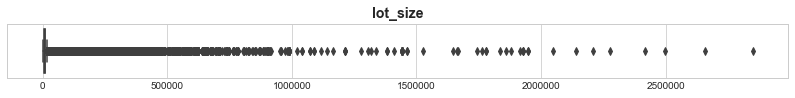

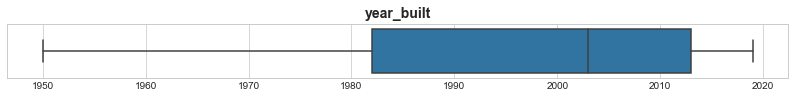

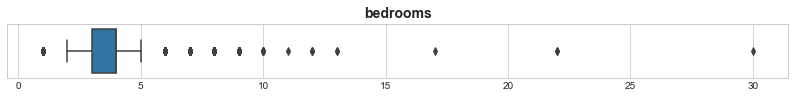

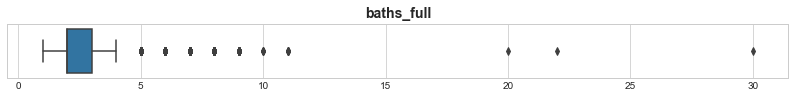

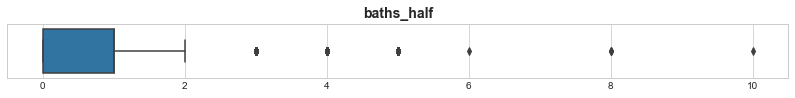

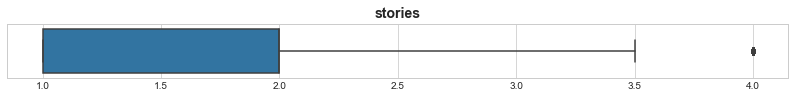

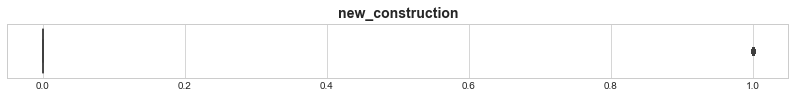

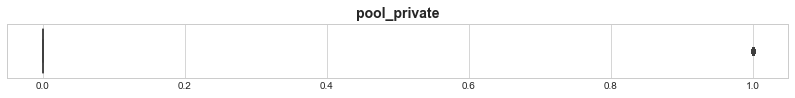

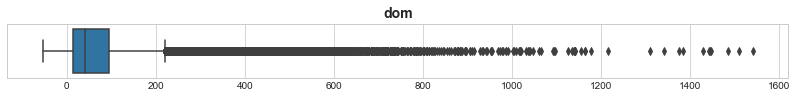

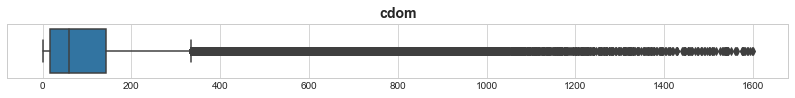

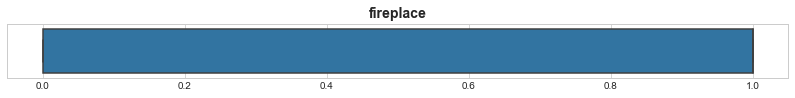

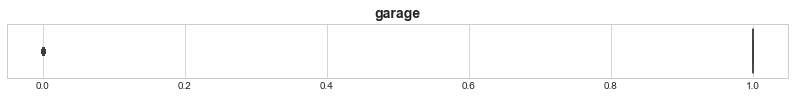

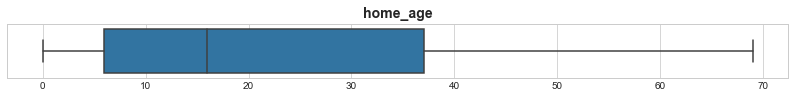

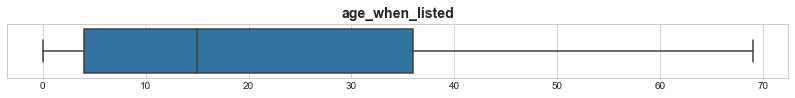

In [95]:
for n in num_cols:
    plt.figure(figsize=(14,1))
    sns.boxplot(df[n])
    plt.title(n, fontsize=14, fontweight='bold')
    plt.xlabel("", fontsize=13, fontweight='bold')
    plt.show()

In [96]:
df.list_price.quantile(.98)

1195000.0

In [97]:
df.bedrooms.max()

30.0

In [98]:
df[df.sq_ft_total!=df.sq_ft_total.max()].sq_ft_total.max()

26401.0

In [99]:
df = df[df.list_price <= 1000000]
df = df[df.sq_ft_total <= 30000]
df = df[df.lot_size <= 100000]
df = df[df.bedrooms <= 5]
df = df[df.baths_full <= 4]
df = df[df.baths_half <= 2]
df = df[df.stories < 4]

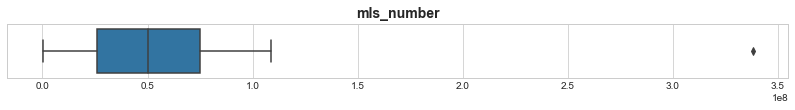

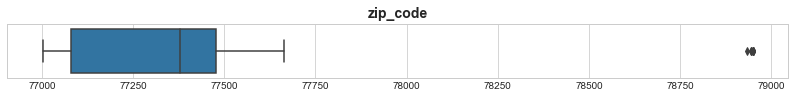

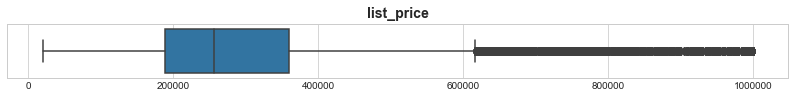

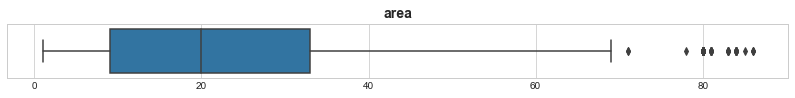

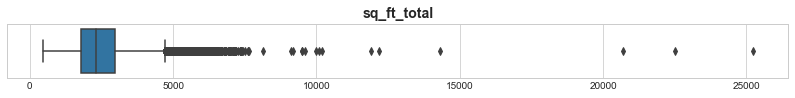

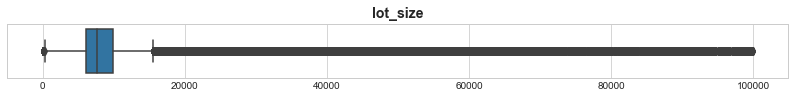

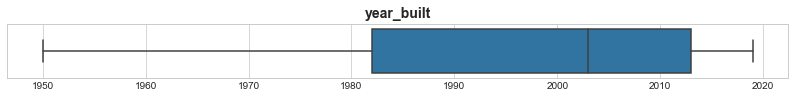

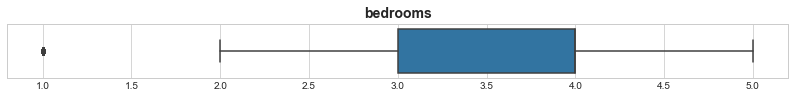

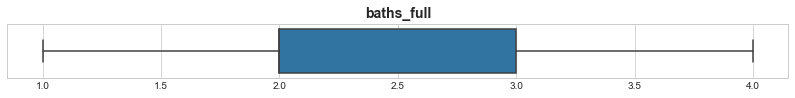

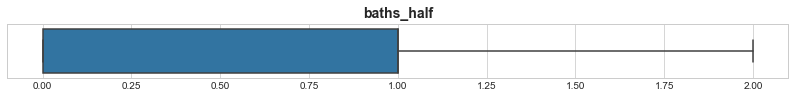

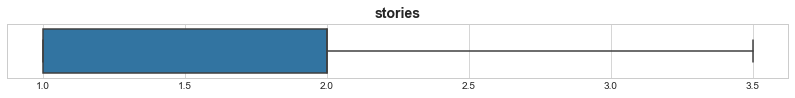

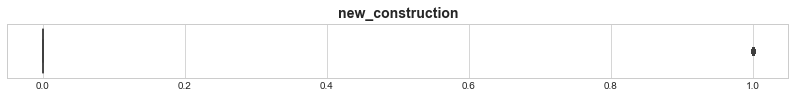

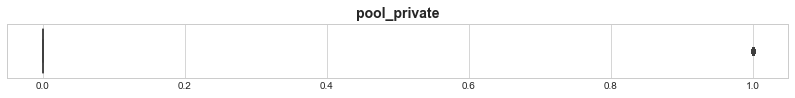

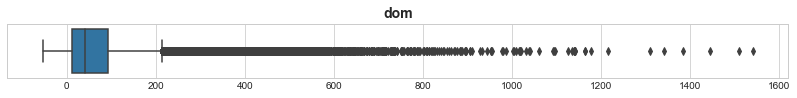

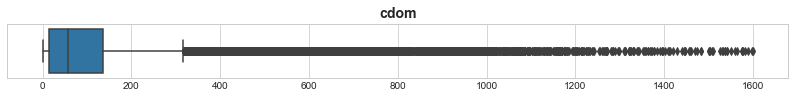

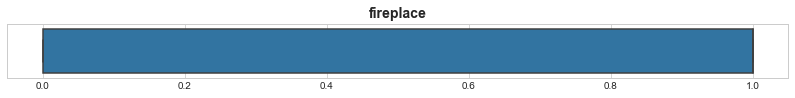

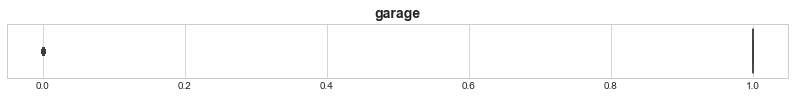

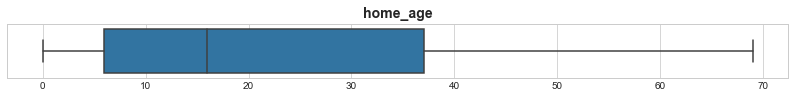

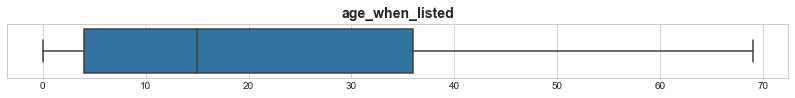

In [100]:
for n in num_cols:
    plt.figure(figsize=(14,1))
    sns.boxplot(df[n])
    plt.title(n, fontsize=14, fontweight='bold')
    plt.xlabel("", fontsize=13, fontweight='bold')
    plt.show()

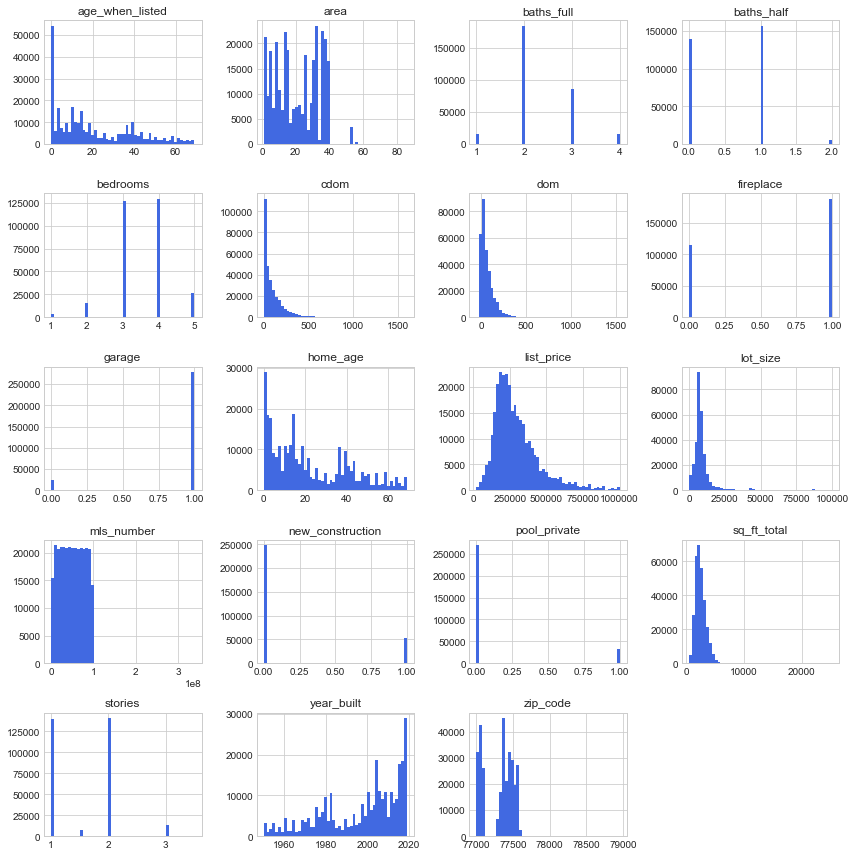

In [101]:
df[df.describe().columns].hist(bins=50, figsize=(12,12), color='royalblue')
plt.tight_layout()
plt.show()

In [102]:
view(df,1)

,mls_number,property_type,status,city,zip_code,county,list_price,area,school_district,school_high,sq_ft_total,lot_size,year_built,bedrooms,baths_full,baths_half,stories,new_construction,pool_private,dom,cdom,list_date,fireplace,garage,home_age,age_when_listed
3,47405549,Single-Family,Sold,Winnie,77665,Chambers,39900,53,18 - East Chambers,EAST CHAMBERS HIGH SCHOOL,672.0,2688.0,1952,2.0,1.0,0.0,1.0,0,0,0.0,123,2017-08-23,0,0,67,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371325,85354305,Single-Family,Withdrawn,Houston,77092,Harris,999900,9,27 - Houston,WALTRIP HIGH SCHOOL,1814.0,23760.0,1950,2.0,2.0,0.0,1.0,0,0,140.0,140,2018-11-14,0,1,69,68


## Exporting DataFrame

In [103]:
df.to_csv('har_explored_cleaned.csv')

## Conclusions

* Homes in better school districts have a higher and more stable selling value. Looking at the sales trends, you can see that the school district makes a big impact on the selling value of homes in the area. Generally, homes in better school districts have a higher and more stable selling value. This can be seen as the case with Katy ISD.
* Of the homes sold, the majority were listed and closed in May. The least frequent listing month of homes that sold was in December, and the least frequent closing month of homes that sold was in January.
* Homes sold in June sold for a higher price on average than any other month, while homes sold in January sold for a lower price on average than any other month. 
* The average list price per sqft for homes that sold was $8.3 per sqft lower than the average list price per sqft.
* The size of the homes built over the decades increased in every aspect (average number of bedrooms, bathrooms, stories, and average sq ft) except for lot size, indicating that overtime newer homes have been built upward more than outward. This makes sense, as the cost of land is constantly increasing, and with the influx of residents, accommodations are made by having smaller lot sizes.